/## TODO - Atualizar com as dogeCoin
<h3>Resumo do que foi feito:</h3>

<h4>Bitcon:</h4>

Foi usada a base do link: https://www.kaggle.com/mczielinski/bitcoin-historical-data?select=bitstampUSD_1-min_data_2012-01-01_to_2021-03-31.csv com a base para os bitcoin. Ela aparenta ter a contação de todas as operações feitas de 2012 a 2021, mas basicamente é pego minuto a minuto. 

Para tratar a base foram apagados linhas que tinham todos os valores de Open	High	Low	Close	Volume_(BTC)	Volume_(Currency)	Weighted_Price nulos e foi transformado a coluna de tempo de timestamp para datatime. Com a datas no formato datatime foi retirado o time e deixei apenas o ano, dia e mês.

A base foi modificada para pegar o valor diario da contação. O maior e menor valor no dia pra usar como a variação máximo do ativo no dia. 

<h4>Elon Musk tweets:</h4>

foi utilizada a base do link: https://www.kaggle.com/ayhmrba/elon-musk-tweets-2010-2021. Ela contém (teoricamente) todos os tweets do Elon Musk de 2010 à 2021.

As datas foram modificadsa para deixar apenas o ano, dia e mês. Foi retirado as colunas que não tinha interesse e ficando apenas as colunas 'nretweets','nlikes','date','tweet' e 'nreplies'.

Foi criada uma base com os tweets que tinham refências as seguintes palavras:  bitcoin, bitcoins, Bitcoins, Bitcoin crypto, cryptocurrency, Crypto, Cryptocurrency.




# Install Dependencies

In [1]:
!pip install vaderSentiment

In [2]:
#imports 
#Tirando os warnings
import warnings
warnings.filterwarnings("ignore")
import datetime
import pandas as pd
import numpy as np
import seaborn as sns
import plotly.express as px
import math
import matplotlib.pyplot as plt
from scipy import stats
from sklearn.preprocessing import LabelEncoder
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score, classification_report, log_loss
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.model_selection import cross_val_score, KFold
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import TomekLinks
from scipy.stats import zscore
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.feature_selection import VarianceThreshold
from sklearn.preprocessing import MinMaxScaler
from imblearn.under_sampling import TomekLinks
from sklearn.metrics import balanced_accuracy_score

In [3]:
# controla tamanho geral das figuras no matplotlib/seaborn
TAMANHO_GERAL = [15, 10]
plt.rcParams['figure.figsize'] = TAMANHO_GERAL
sns.set(rc={'figure.figsize' : TAMANHO_GERAL})

In [46]:

# import SentimentIntensityAnalyzer class
# from vaderSentiment.vaderSentiment module.
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
 
# function to print sentiments
# of the sentence.
def sentiment_scores(sentence):
 
    # Create a SentimentIntensityAnalyzer object.
    sid_obj = SentimentIntensityAnalyzer()
 
    # polarity_scores method of SentimentIntensityAnalyzer
    # object gives a sentiment dictionary.
    # which contains pos, neg, neu, and compound scores.
    sentiment_dict = sid_obj.polarity_scores(sentence)
     
 
    # decide sentiment as positive, negative and neutral
    if sentiment_dict['compound'] >= 0.05 :
        return "Positive"
 
    elif sentiment_dict['compound'] <= - 0.05 :
         return  "Negative"
 
    else :
         return "Neutral"
 

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


<h1> Base do historico dos preço do bitcoin</h1>

In [61]:
#Caminho para o data set
# https://www.kaggle.com/mczielinski/bitcoin-historical-data?select=bitstampUSD_1-min_data_2012-01-01_to_2021-03-31.csv

df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Dataset/data_2012-01-01_to_2021-03-31.csv')
df

,Timestamp,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price
0,1325317920,4.39,4.39,4.39,4.39,0.455581,2.000000,4.390000
1,1325317980,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1325318040,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1325318100,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1325318160,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
4857372,1617148560,58714.31,58714.31,58686.00,58686.00,1.384487,81259.372187,58692.753339
4857373,1617148620,58683.97,58693.43,58683.97,58685.81,7.294848,428158.146640,58693.226508
4857374,1617148680,58693.43,58723.84,58693.43,58723.84,1.705682,100117.070370,58696.198496
4857375,1617148740,58742.18,58770.38,58742.18,58760.59,0.720415,42332.958633,58761.866202


In [62]:
total_tam = len(df)
total_tam

4857377

In [63]:
#Verificando casos vazios por coluna/atributo
df.isnull().sum()

Timestamp                  0
Open                 1243608
High                 1243608
Low                  1243608
Close                1243608
Volume_(BTC)         1243608
Volume_(Currency)    1243608
Weighted_Price       1243608
dtype: int64

In [64]:
#descartando os dados vazios
df = df.dropna(how="all",subset=df.columns[1:])
df

,Timestamp,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price
0,1325317920,4.39,4.39,4.39,4.39,0.455581,2.000000,4.390000
478,1325346600,4.39,4.39,4.39,4.39,48.000000,210.720000,4.390000
547,1325350740,4.50,4.57,4.50,4.57,37.862297,171.380338,4.526411
548,1325350800,4.58,4.58,4.58,4.58,9.000000,41.220000,4.580000
1224,1325391360,4.58,4.58,4.58,4.58,1.502000,6.879160,4.580000
...,...,...,...,...,...,...,...,...
4857372,1617148560,58714.31,58714.31,58686.00,58686.00,1.384487,81259.372187,58692.753339
4857373,1617148620,58683.97,58693.43,58683.97,58685.81,7.294848,428158.146640,58693.226508
4857374,1617148680,58693.43,58723.84,58693.43,58723.84,1.705682,100117.070370,58696.198496
4857375,1617148740,58742.18,58770.38,58742.18,58760.59,0.720415,42332.958633,58761.866202


In [65]:
not_null_tam =  len(df)
not_null_tam

3613769

In [66]:
total_tam

4857377

In [67]:
drop_tam =  total_tam - not_null_tam
drop_tam

1243608

In [68]:
#tranformando o timestamp em datatime 's' (1325317920) => datetime	2011-12-31 07:52:00
df['Timestamp'] = pd.to_datetime(df['Timestamp'], unit='s')
df

,Timestamp,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price
0,2011-12-31 07:52:00,4.39,4.39,4.39,4.39,0.455581,2.000000,4.390000
478,2011-12-31 15:50:00,4.39,4.39,4.39,4.39,48.000000,210.720000,4.390000
547,2011-12-31 16:59:00,4.50,4.57,4.50,4.57,37.862297,171.380338,4.526411
548,2011-12-31 17:00:00,4.58,4.58,4.58,4.58,9.000000,41.220000,4.580000
1224,2012-01-01 04:16:00,4.58,4.58,4.58,4.58,1.502000,6.879160,4.580000
...,...,...,...,...,...,...,...,...
4857372,2021-03-30 23:56:00,58714.31,58714.31,58686.00,58686.00,1.384487,81259.372187,58692.753339
4857373,2021-03-30 23:57:00,58683.97,58693.43,58683.97,58685.81,7.294848,428158.146640,58693.226508
4857374,2021-03-30 23:58:00,58693.43,58723.84,58693.43,58723.84,1.705682,100117.070370,58696.198496
4857375,2021-03-30 23:59:00,58742.18,58770.38,58742.18,58760.59,0.720415,42332.958633,58761.866202


In [69]:
# set index timestamp column
df = df.set_index("Timestamp")

In [70]:
# range timestamp 
df['2014-01-01':'2014-02-01']

,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price
Timestamp,,,,,,,
2014-01-01 00:00:00,732.00,732.00,732.00,732.00,4.599562,3366.879047,732.000000
2014-01-01 00:02:00,732.01,732.75,729.01,729.01,1.138530,830.438062,729.394976
2014-01-01 00:03:00,730.24,732.76,730.24,732.76,0.121000,88.596624,732.203507
2014-01-01 00:04:00,732.76,734.00,732.76,734.00,52.120000,38251.836202,733.918576
2014-01-01 00:05:00,733.70,734.00,730.51,734.00,2.710080,1984.290334,732.188752
...,...,...,...,...,...,...,...
2014-02-01 23:54:00,813.24,813.24,813.24,813.24,0.941409,765.591089,813.240000
2014-02-01 23:55:00,813.23,813.23,813.23,813.23,0.132942,108.112057,813.230000
2014-02-01 23:56:00,813.23,813.23,813.03,813.23,0.338572,275.289949,813.092025


In [71]:
#Avaliando só em um mês
#three month
#data inicial
dataIni='2018-1-1'
#data final
dataFim='2021-4-1'

In [72]:
#criando um dataset com os dados do intervalo das datas
df = df[dataIni : dataFim] 
df

,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price
Timestamp,,,,,,,
2018-01-01 00:00:00,13880.00,13906.37,13841.00,13841.01,4.967997,69030.718890,13895.081610
2018-01-01 00:01:00,13841.01,13890.43,13841.01,13890.43,1.665850,23064.082359,13845.237237
2018-01-01 00:02:00,13846.64,13890.35,13846.64,13847.51,0.269346,3739.690844,13884.349123
2018-01-01 00:03:00,13847.51,13874.92,13823.19,13823.19,1.155274,15986.279494,13837.650132
2018-01-01 00:04:00,13823.19,13826.75,13803.20,13803.20,0.646691,8930.465767,13809.482390
...,...,...,...,...,...,...,...
2021-03-30 23:56:00,58714.31,58714.31,58686.00,58686.00,1.384487,81259.372187,58692.753339
2021-03-30 23:57:00,58683.97,58693.43,58683.97,58685.81,7.294848,428158.146640,58693.226508
2021-03-30 23:58:00,58693.43,58723.84,58693.43,58723.84,1.705682,100117.070370,58696.198496


In [73]:
df.index.date

array([datetime.date(2018, 1, 1), datetime.date(2018, 1, 1),
       datetime.date(2018, 1, 1), ..., datetime.date(2021, 3, 30),
       datetime.date(2021, 3, 30), datetime.date(2021, 3, 31)],
      dtype=object)

In [74]:
len(df.index.date)

1661033

In [75]:
#Create new column date
df["Date"] = df.index.date

In [76]:
# new max date
df.groupby("Date").max()

,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price
Date,,,,,,,
2018-01-01,13941.49,13941.75,13881.79,13941.49,94.230516,1.279566e+06,13932.655493
2018-01-02,15251.70,15257.53,15190.00,15253.00,308.037285,4.081409e+06,15228.646803
2018-01-03,15437.65,15500.00,15365.00,15437.65,226.192616,3.366312e+06,15461.751378
2018-01-04,15429.11,15430.27,15358.02,15394.96,182.825465,2.726120e+06,15387.413701
2018-01-05,17089.99,17200.00,17075.65,17090.03,231.114977,3.954660e+06,17111.223707
...,...,...,...,...,...,...,...
2021-03-27,56591.91,56686.15,56506.66,56591.90,50.691653,2.809330e+06,56563.515427
2021-03-28,56497.92,56573.04,56497.92,56545.59,24.259556,1.356818e+06,56521.867273
2021-03-29,58304.20,58402.68,58280.05,58309.35,60.555949,3.502284e+06,58360.318459


In [77]:
# Group by Date index get min and add suffix in columns(_min)
df.groupby("Date").min().add_suffix('_min')

,Open_min,High_min,Low_min,Close_min,Volume_(BTC)_min,Volume_(Currency)_min,Weighted_Price_min
Date,,,,,,,
2018-01-01,12840.00,12868.86,12801.38,12839.05,0.003812,51.702883,12823.580565
2018-01-02,12939.99,12950.18,12910.58,12940.00,0.021442,288.478987,12932.761563
2018-01-03,14549.00,14594.58,14546.28,14559.60,0.019167,283.284400,14571.236350
2018-01-04,14192.37,14234.44,14192.37,14192.37,0.088733,1317.076273,14214.643130
2018-01-05,14811.00,14845.00,14810.00,14820.00,0.000589,8.814139,14814.893463
...,...,...,...,...,...,...,...
2021-03-27,53995.00,54032.42,53948.35,54000.00,0.000700,38.484495,53981.092754
2021-03-28,54679.73,54792.40,54677.51,54679.73,0.000690,38.009540,54731.735728
2021-03-29,54919.82,54944.90,54892.42,54915.41,0.000517,28.498713,54909.254762


In [78]:
#concat df group by date max and group by min 

dfMaxMin_perDay = pd.concat([df.groupby("Date").max().add_suffix('_max'), df.groupby("Date").min().add_suffix('_min')], axis=1)

In [79]:
dfMaxMin_perDay

,Open_max,High_max,Low_max,Close_max,Volume_(BTC)_max,Volume_(Currency)_max,Weighted_Price_max,Open_min,High_min,Low_min,Close_min,Volume_(BTC)_min,Volume_(Currency)_min,Weighted_Price_min
Date,,,,,,,,,,,,,,
2018-01-01,13941.49,13941.75,13881.79,13941.49,94.230516,1.279566e+06,13932.655493,12840.00,12868.86,12801.38,12839.05,0.003812,51.702883,12823.580565
2018-01-02,15251.70,15257.53,15190.00,15253.00,308.037285,4.081409e+06,15228.646803,12939.99,12950.18,12910.58,12940.00,0.021442,288.478987,12932.761563
2018-01-03,15437.65,15500.00,15365.00,15437.65,226.192616,3.366312e+06,15461.751378,14549.00,14594.58,14546.28,14559.60,0.019167,283.284400,14571.236350
2018-01-04,15429.11,15430.27,15358.02,15394.96,182.825465,2.726120e+06,15387.413701,14192.37,14234.44,14192.37,14192.37,0.088733,1317.076273,14214.643130
2018-01-05,17089.99,17200.00,17075.65,17090.03,231.114977,3.954660e+06,17111.223707,14811.00,14845.00,14810.00,14820.00,0.000589,8.814139,14814.893463
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-03-27,56591.91,56686.15,56506.66,56591.90,50.691653,2.809330e+06,56563.515427,53995.00,54032.42,53948.35,54000.00,0.000700,38.484495,53981.092754
2021-03-28,56497.92,56573.04,56497.92,56545.59,24.259556,1.356818e+06,56521.867273,54679.73,54792.40,54677.51,54679.73,0.000690,38.009540,54731.735728
2021-03-29,58304.20,58402.68,58280.05,58309.35,60.555949,3.502284e+06,58360.318459,54919.82,54944.90,54892.42,54915.41,0.000517,28.498713,54909.254762


#### dfMaxMin_perDay contém todos os dados "max" e "min" para um determinado dia

<h1>Base de tweets do Elon musk</h1>

In [ ]:
#leitura da base 
# https://www.kaggle.com/ayhmrba/elon-musk-tweets-2010-2021
dfElonMusk = pd.read_csv('https://drive.google.com/uc?export=download&id=17S6ha416OK2C8_s8T4nD6REsUxVZdfCe')

In [ ]:
# convert to datetime
dfElonMusk["date"] = pd.to_datetime(dfElonMusk["date"])
# set indest date
dfElonMusk = dfElonMusk.set_index("date")
# rename column date
dfElonMusk = dfElonMusk.rename_axis(index="Date")

In [ ]:
#set index to date
dfElonMusk.index = dfElonMusk.index.date

In [ ]:
dfElonMusk

,id,conversation_id,created_at,timezone,place,tweet,language,hashtags,cashtags,user_id,user_id_str,username,name,day,hour,link,urls,photos,video,thumbnail,retweet,nlikes,nreplies,nretweets,quote_url,search,near,geo,source,user_rt_id,user_rt,retweet_id,reply_to,retweet_date,translate,trans_src,trans_dest,filename
2010-06-04,15434727182,15434727182,1.275676e+12,0,NaN,"Please ignore prior tweets, as that was someon...",en,[],[],44196397,44196397,elonmusk,Elon Musk,5,18,https://twitter.com/elonmusk/status/15434727182,[],[],0,NaN,False,4652,391,348,NaN,None,NaN,NaN,NaN,NaN,NaN,NaN,[],NaN,NaN,NaN,NaN,/content/drive/MyDrive/Residencia Visao Comput...
2011-12-28,152153637639028736,152151847614943233,1.325111e+12,0,NaN,@TheOnion So true :),en,[],[],44196397,44196397,elonmusk,Elon Musk,3,22,https://twitter.com/elonmusk/status/1521536376...,[],[],0,NaN,False,12,7,1,NaN,None,NaN,NaN,NaN,NaN,NaN,NaN,[],NaN,NaN,NaN,NaN,/content/drive/MyDrive/Residencia Visao Comput...
2011-12-27,151809315026636800,151809315026636800,1.325029e+12,0,NaN,If you ever wanted to know the *real* truth ab...,en,[],[],44196397,44196397,elonmusk,Elon Musk,2,23,https://twitter.com/elonmusk/status/1518093150...,['http://j.mp/vLhhov'],[],0,NaN,False,39,13,34,NaN,None,NaN,NaN,NaN,NaN,NaN,NaN,[],NaN,NaN,NaN,NaN,/content/drive/MyDrive/Residencia Visao Comput...
2011-12-26,151338939389706242,151338939389706242,1.324917e+12,0,NaN,Walked around a neighborhood recently rebuilt ...,en,[],[],44196397,44196397,elonmusk,Elon Musk,1,16,https://twitter.com/elonmusk/status/1513389393...,[],['https://pbs.twimg.com/media/Ahmp9qtCAAAYPDX....,1,https://pbs.twimg.com/media/Ahmp9qtCAAAYPDX.jpg,False,155,9,18,NaN,None,NaN,NaN,NaN,NaN,NaN,NaN,[],NaN,NaN,NaN,NaN,/content/drive/MyDrive/Residencia Visao Comput...
2011-12-26,151337237429239808,151337237429239808,1.324917e+12,0,NaN,"It was Xmas, so we brought presents for the ki...",en,[],[],44196397,44196397,elonmusk,Elon Musk,1,16,https://twitter.com/elonmusk/status/1513372374...,[],['https://pbs.twimg.com/media/AhmoamaCQAANvSt....,1,https://pbs.twimg.com/media/AhmoamaCQAANvSt.jpg,False,158,15,13,NaN,None,NaN,NaN,NaN,NaN,NaN,NaN,[],NaN,NaN,NaN,NaN,/content/drive/MyDrive/Residencia Visao Comput...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2011-12-03,142881284019060736,142881284019060736,1.322901e+12,0,NaN,That was a total non sequitur btw,en,[],[],44196397,44196397,elonmusk,Elon Musk,6,8,https://twitter.com/elonmusk/status/1428812840...,[],[],0,NaN,False,53,31,6,NaN,None,NaN,NaN,NaN,NaN,NaN,NaN,[],NaN,NaN,NaN,NaN,/content/drive/MyDrive/Residencia Visao Comput...
2011-12-03,142880871391838208,142880871391838208,1.322900e+12,0,NaN,"Great Voltaire quote, arguably better than Twa...",en,[],[],44196397,44196397,elonmusk,Elon Musk,6,8,https://twitter.com/elonmusk/status/1428808713...,[],[],0,NaN,False,29,7,25,NaN,None,NaN,NaN,NaN,NaN,NaN,NaN,[],NaN,NaN,NaN,NaN,/content/drive/MyDrive/Residencia Visao Comput...
2011-12-01,142188458125963264,142188458125963264,1.322735e+12,0,NaN,I made the volume on the Model S http://t.co/...,en,[],[],44196397,44196397,elonmusk,Elon Musk,4,10,https://twitter.com/elonmusk/status/1421884581...,['http://ow.ly/i/mtD7'],[],0,NaN,False,78,31,9,NaN,None,NaN,NaN,NaN,NaN,NaN,NaN,[],NaN,NaN,NaN,NaN,/content/drive/MyDrive/Residencia Visao Comput...
2011-12-01,142179928203460608,142179928203460608,1.322733e+12,0,NaN,Went to Iceland on Sat to ride bumper cars on ...,en,[],[],44196397,44196397,elonmusk,Elon Musk,4,9,https://twitter.com/elonmusk/status/1421799282...,[],['https://pbs.twimg.com/media/Afkf5DMCAAEJGFr....,1,https://pbs.twimg.com/media/Afkf5DMCAAEJGFr.jpg,False,189,32,15,NaN,None,NaN,NaN,NaN,NaN,NaN,NaN,[],NaN,NaN,NaN,NaN,/content/drive/MyDrive/Residencia Visao Comput...


In [ ]:
#Colunas/atributo
dfElonMusk.columns

Index(['id', 'conversation_id', 'created_at', 'timezone', 'place', 'tweet',
       'language', 'hashtags', 'cashtags', 'user_id', 'user_id_str',
       'username', 'name', 'day', 'hour', 'link', 'urls', 'photos', 'video',
       'thumbnail', 'retweet', 'nlikes', 'nreplies', 'nretweets', 'quote_url',
       'search', 'near', 'geo', 'source', 'user_rt_id', 'user_rt',
       'retweet_id', 'reply_to', 'retweet_date', 'translate', 'trans_src',
       'trans_dest', 'filename'],
      dtype='object')

In [ ]:
#Drop na all  vertical axis 
dfElonMusk = dfElonMusk.dropna(how="all", axis = 1)
dfElonMusk

,id,conversation_id,created_at,timezone,tweet,language,hashtags,cashtags,user_id,user_id_str,username,name,day,hour,link,urls,photos,video,thumbnail,retweet,nlikes,nreplies,nretweets,quote_url,search,reply_to,filename
2010-06-04,15434727182,15434727182,1.275676e+12,0,"Please ignore prior tweets, as that was someon...",en,[],[],44196397,44196397,elonmusk,Elon Musk,5,18,https://twitter.com/elonmusk/status/15434727182,[],[],0,NaN,False,4652,391,348,NaN,None,[],/content/drive/MyDrive/Residencia Visao Comput...
2011-12-28,152153637639028736,152151847614943233,1.325111e+12,0,@TheOnion So true :),en,[],[],44196397,44196397,elonmusk,Elon Musk,3,22,https://twitter.com/elonmusk/status/1521536376...,[],[],0,NaN,False,12,7,1,NaN,None,[],/content/drive/MyDrive/Residencia Visao Comput...
2011-12-27,151809315026636800,151809315026636800,1.325029e+12,0,If you ever wanted to know the *real* truth ab...,en,[],[],44196397,44196397,elonmusk,Elon Musk,2,23,https://twitter.com/elonmusk/status/1518093150...,['http://j.mp/vLhhov'],[],0,NaN,False,39,13,34,NaN,None,[],/content/drive/MyDrive/Residencia Visao Comput...
2011-12-26,151338939389706242,151338939389706242,1.324917e+12,0,Walked around a neighborhood recently rebuilt ...,en,[],[],44196397,44196397,elonmusk,Elon Musk,1,16,https://twitter.com/elonmusk/status/1513389393...,[],['https://pbs.twimg.com/media/Ahmp9qtCAAAYPDX....,1,https://pbs.twimg.com/media/Ahmp9qtCAAAYPDX.jpg,False,155,9,18,NaN,None,[],/content/drive/MyDrive/Residencia Visao Comput...
2011-12-26,151337237429239808,151337237429239808,1.324917e+12,0,"It was Xmas, so we brought presents for the ki...",en,[],[],44196397,44196397,elonmusk,Elon Musk,1,16,https://twitter.com/elonmusk/status/1513372374...,[],['https://pbs.twimg.com/media/AhmoamaCQAANvSt....,1,https://pbs.twimg.com/media/AhmoamaCQAANvSt.jpg,False,158,15,13,NaN,None,[],/content/drive/MyDrive/Residencia Visao Comput...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2011-12-03,142881284019060736,142881284019060736,1.322901e+12,0,That was a total non sequitur btw,en,[],[],44196397,44196397,elonmusk,Elon Musk,6,8,https://twitter.com/elonmusk/status/1428812840...,[],[],0,NaN,False,53,31,6,NaN,None,[],/content/drive/MyDrive/Residencia Visao Comput...
2011-12-03,142880871391838208,142880871391838208,1.322900e+12,0,"Great Voltaire quote, arguably better than Twa...",en,[],[],44196397,44196397,elonmusk,Elon Musk,6,8,https://twitter.com/elonmusk/status/1428808713...,[],[],0,NaN,False,29,7,25,NaN,None,[],/content/drive/MyDrive/Residencia Visao Comput...
2011-12-01,142188458125963264,142188458125963264,1.322735e+12,0,I made the volume on the Model S http://t.co/...,en,[],[],44196397,44196397,elonmusk,Elon Musk,4,10,https://twitter.com/elonmusk/status/1421884581...,['http://ow.ly/i/mtD7'],[],0,NaN,False,78,31,9,NaN,None,[],/content/drive/MyDrive/Residencia Visao Comput...
2011-12-01,142179928203460608,142179928203460608,1.322733e+12,0,Went to Iceland on Sat to ride bumper cars on ...,en,[],[],44196397,44196397,elonmusk,Elon Musk,4,9,https://twitter.com/elonmusk/status/1421799282...,[],['https://pbs.twimg.com/media/Afkf5DMCAAEJGFr....,1,https://pbs.twimg.com/media/Afkf5DMCAAEJGFr.jpg,False,189,32,15,NaN,None,[],/content/drive/MyDrive/Residencia Visao Comput...


In [ ]:
#colunas desejadas
quero = ['nretweets','nlikes','tweet','nreplies']

In [ ]:
#select subdataframe by columns
dfElonMusk = dfElonMusk[quero]

In [ ]:
# incluir palavras sobre finanças também? money...

In [ ]:
#looking for tweet text contains the words
dfElonMusk[dfElonMusk["tweet"].str.contains("bitcoin|bitcoins|Bitcoins|Bitcoin|crypto|cryptocurrency|Crypto|Cryptocurrency|btc|blockchain|Blockchain" , na=False)].shape

(70, 4)

In [ ]:
#linhas em que são citados o bitcoins
dfElonMusk_Bitcoin = dfElonMusk[dfElonMusk["tweet"].str.contains("bitcoin|bitcoins|Bitcoins|Bitcoin|crypto|cryptocurrency|Crypto|Cryptocurrency|btc|blockchain|Blockchain" , na=False)]
dfElonMusk_Bitcoin

,nretweets,nlikes,tweet,nreplies
2018-10-22,7397,24039,@vicentes @Grimezsz Wanna buy some Bitcoin? 😉😉...,1088
2018-05-24,108,3258,@CryptoAlesio Yo,24
2018-05-05,6765,49948,Cryptocandy,1860
2018-02-25,161,1553,@cheresh @andrestaltz End-to-end encryption en...,91
2018-02-22,119,1147,@DeadlyBananas @MichaelAVaughn Not sure. I let...,162
...,...,...,...,...
2018-05-24,111,3294,@CryptoAlesio Yo,25
2018-05-05,6859,50360,Cryptocandy,1868
2018-02-25,162,1558,@cheresh @andrestaltz End-to-end encryption en...,91
2018-02-22,120,1161,@DeadlyBananas @MichaelAVaughn Not sure. I let...,161


In [ ]:
#Quantidade de tweets encontrada
dfElonMusk_Bitcoin.shape[0]

70

In [ ]:
dfElonMusk_Bitcoin

,nretweets,nlikes,tweet,nreplies
2018-10-22,7397,24039,@vicentes @Grimezsz Wanna buy some Bitcoin? 😉😉...,1088
2018-05-24,108,3258,@CryptoAlesio Yo,24
2018-05-05,6765,49948,Cryptocandy,1860
2018-02-25,161,1553,@cheresh @andrestaltz End-to-end encryption en...,91
2018-02-22,119,1147,@DeadlyBananas @MichaelAVaughn Not sure. I let...,162
...,...,...,...,...
2018-05-24,111,3294,@CryptoAlesio Yo,25
2018-05-05,6859,50360,Cryptocandy,1868
2018-02-25,162,1558,@cheresh @andrestaltz End-to-end encryption en...,91
2018-02-22,120,1161,@DeadlyBananas @MichaelAVaughn Not sure. I let...,161


In [ ]:
dfMaxMin_perDay

,Open_max,High_max,Low_max,Close_max,Volume_(BTC)_max,Volume_(Currency)_max,Weighted_Price_max,Open_min,High_min,Low_min,Close_min,Volume_(BTC)_min,Volume_(Currency)_min,Weighted_Price_min
Date,,,,,,,,,,,,,,
2018-01-01,13941.49,13941.75,13881.79,13941.49,94.230516,1.279566e+06,13932.655493,12840.00,12868.86,12801.38,12839.05,0.003812,51.702883,12823.580565
2018-01-02,15251.70,15257.53,15190.00,15253.00,308.037285,4.081409e+06,15228.646803,12939.99,12950.18,12910.58,12940.00,0.021442,288.478987,12932.761563
2018-01-03,15437.65,15500.00,15365.00,15437.65,226.192616,3.366312e+06,15461.751378,14549.00,14594.58,14546.28,14559.60,0.019167,283.284400,14571.236350
2018-01-04,15429.11,15430.27,15358.02,15394.96,182.825465,2.726120e+06,15387.413701,14192.37,14234.44,14192.37,14192.37,0.088733,1317.076273,14214.643130
2018-01-05,17089.99,17200.00,17075.65,17090.03,231.114977,3.954660e+06,17111.223707,14811.00,14845.00,14810.00,14820.00,0.000589,8.814139,14814.893463
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-03-27,56591.91,56686.15,56506.66,56591.90,50.691653,2.809330e+06,56563.515427,53995.00,54032.42,53948.35,54000.00,0.000700,38.484495,53981.092754
2021-03-28,56497.92,56573.04,56497.92,56545.59,24.259556,1.356818e+06,56521.867273,54679.73,54792.40,54677.51,54679.73,0.000690,38.009540,54731.735728
2021-03-29,58304.20,58402.68,58280.05,58309.35,60.555949,3.502284e+06,58360.318459,54919.82,54944.90,54892.42,54915.41,0.000517,28.498713,54909.254762


Análise rápida do bitcoin, usando os dois dataframes anteriores (com index diário)

A interseção das datas é o dataset dos tweets de bitcoin (o dataset maior possui todas as datas)

In [ ]:
len(list(set(dfMaxMin_perDay.index).intersection(set(dfElonMusk_Bitcoin.index)))), len(set(dfElonMusk_Bitcoin.index))

(25, 25)

In [ ]:
lista_de_dias_com_tweet = list(set(dfMaxMin_perDay.index).intersection(set(dfElonMusk_Bitcoin.index)))

In [ ]:
#Intersection days between tweets  and elon musk
lista_de_dias_com_tweet

[datetime.date(2020, 2, 1),
 datetime.date(2021, 2, 9),
 datetime.date(2021, 2, 7),
 datetime.date(2020, 7, 19),
 datetime.date(2021, 2, 4),
 datetime.date(2021, 3, 2),
 datetime.date(2020, 11, 16),
 datetime.date(2019, 5, 7),
 datetime.date(2019, 4, 2),
 datetime.date(2021, 2, 20),
 datetime.date(2018, 5, 5),
 datetime.date(2021, 3, 12),
 datetime.date(2019, 4, 13),
 datetime.date(2020, 5, 15),
 datetime.date(2020, 5, 1),
 datetime.date(2020, 1, 10),
 datetime.date(2018, 2, 22),
 datetime.date(2019, 2, 21),
 datetime.date(2018, 1, 29),
 datetime.date(2021, 2, 19),
 datetime.date(2018, 2, 25),
 datetime.date(2018, 10, 22),
 datetime.date(2018, 5, 24),
 datetime.date(2020, 12, 20),
 datetime.date(2021, 2, 10)]

In [ ]:
#recovery bitcoin twets instaces   by intersection result
dfMaxMin_perDay_OnlyOnTweets = dfMaxMin_perDay.loc[lista_de_dias_com_tweet].sort_index()

In [ ]:
#recovery elonmusk twets instaces   by intersection result

dfElonMusk_Bitcoin_OnlyOnTweets = dfElonMusk_Bitcoin.loc[lista_de_dias_com_tweet].sort_index()

In [ ]:
#get shape

dfMaxMin_perDay_OnlyOnTweets.shape

(25, 14)

In [ ]:
#get columns
dfMaxMin_perDay_OnlyOnTweets.columns

Index(['Open_max', 'High_max', 'Low_max', 'Close_max', 'Volume_(BTC)_max',
       'Volume_(Currency)_max', 'Weighted_Price_max', 'Open_min', 'High_min',
       'Low_min', 'Close_min', 'Volume_(BTC)_min', 'Volume_(Currency)_min',
       'Weighted_Price_min'],
      dtype='object')

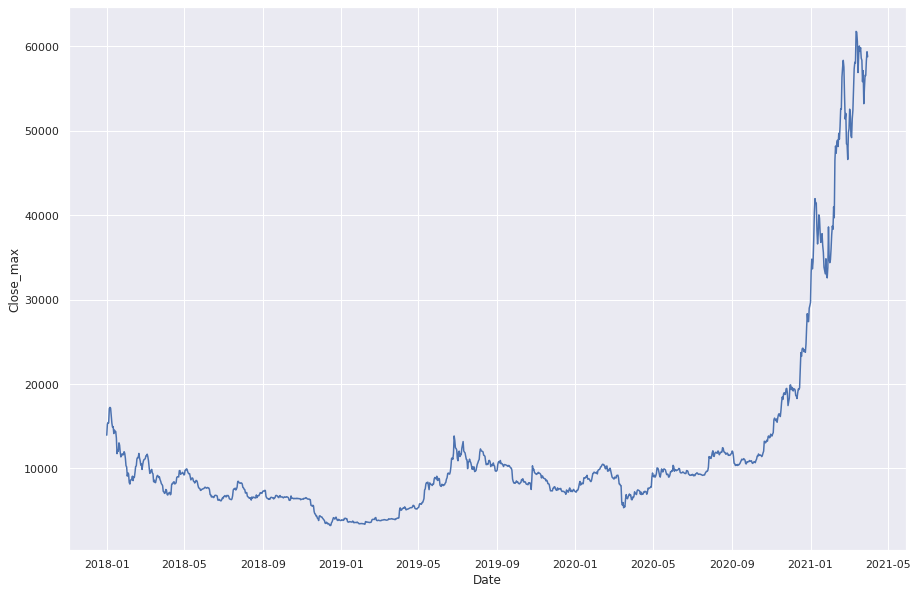

In [ ]:
# plot historical bitcoin tweet by close_max
sns.lineplot(data = dfMaxMin_perDay, x = "Date", y = "Close_max")

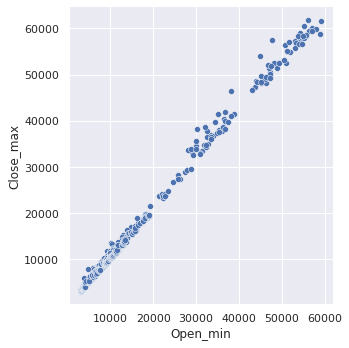

In [ ]:
#Check min open and max close
sns.relplot(x="Open_min", y="Close_max", data=dfMaxMin_perDay)

In [ ]:
dfMaxMin_perDay.columns

Index(['Open_max', 'High_max', 'Low_max', 'Close_max', 'Volume_(BTC)_max',
       'Volume_(Currency)_max', 'Weighted_Price_max', 'Open_min', 'High_min',
       'Low_min', 'Close_min', 'Volume_(BTC)_min', 'Volume_(Currency)_min',
       'Weighted_Price_min'],
      dtype='object')

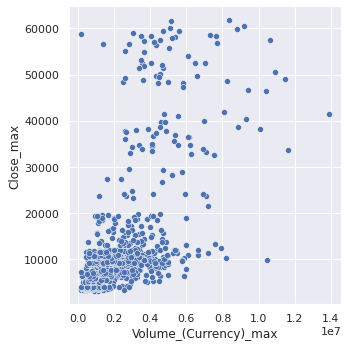

In [ ]:
#Check Volume_(Currency)_max and close_max

sns.relplot(x="Volume_(Currency)_max", y="Close_max", data=dfMaxMin_perDay)

In [ ]:
# create new column tweet_de_elon_musk
dfMaxMin_perDay["tweet_de_elon_musk"] = False

In [ ]:
dfMaxMin_perDay

,Open_max,High_max,Low_max,Close_max,Volume_(BTC)_max,Volume_(Currency)_max,Weighted_Price_max,Open_min,High_min,Low_min,Close_min,Volume_(BTC)_min,Volume_(Currency)_min,Weighted_Price_min,tweet_de_elon_musk
Date,,,,,,,,,,,,,,,
2018-01-01,13941.49,13941.75,13881.79,13941.49,94.230516,1.279566e+06,13932.655493,12840.00,12868.86,12801.38,12839.05,0.003811,51.702883,12823.580565,False
2018-01-02,15251.70,15257.53,15190.00,15253.00,308.037285,4.081409e+06,15228.646803,12939.99,12950.18,12910.58,12940.00,0.021442,288.478987,12932.761563,False
2018-01-03,15437.65,15500.00,15365.00,15437.65,226.192616,3.366312e+06,15461.751378,14549.00,14594.58,14546.28,14559.60,0.019167,283.284400,14571.236350,False
2018-01-04,15429.11,15430.27,15358.02,15394.96,182.825465,2.726120e+06,15387.413701,14192.37,14234.44,14192.37,14192.37,0.088733,1317.076273,14214.643130,False
2018-01-05,17089.99,17200.00,17075.65,17090.03,231.114977,3.954660e+06,17111.223707,14811.00,14845.00,14810.00,14820.00,0.000589,8.814139,14814.893463,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-03-27,56591.91,56686.15,56506.66,56591.90,50.691653,2.809330e+06,56563.515427,53995.00,54032.42,53948.35,54000.00,0.000700,38.484495,53981.092754,False
2021-03-28,56497.92,56573.04,56497.92,56545.59,24.259556,1.356818e+06,56521.867273,54679.73,54792.40,54677.51,54679.73,0.000690,38.009540,54731.735728,False
2021-03-29,58304.20,58402.68,58280.05,58309.35,60.555949,3.502284e+06,58360.318459,54919.82,54944.90,54892.42,54915.41,0.000517,28.498713,54909.254762,False


In [ ]:
# set column with true as intersection result bitcoin and musk tweets
dfMaxMin_perDay.loc[lista_de_dias_com_tweet, ["tweet_de_elon_musk"]] = True

In [ ]:
dfMaxMin_perDay.loc[lista_de_dias_com_tweet]["tweet_de_elon_musk"]

Date
2020-02-01    True
2021-02-09    True
2021-02-07    True
2020-07-19    True
2021-02-04    True
2021-03-02    True
2020-11-16    True
2019-05-07    True
2019-04-02    True
2021-02-20    True
2018-05-05    True
2021-03-12    True
2019-04-13    True
2020-05-15    True
2020-05-01    True
2020-01-10    True
2018-02-22    True
2019-02-21    True
2018-01-29    True
2021-02-19    True
2018-02-25    True
2018-10-22    True
2018-05-24    True
2020-12-20    True
2021-02-10    True
Name: tweet_de_elon_musk, dtype: object

In [ ]:
dfMaxMin_perDay[dfMaxMin_perDay["tweet_de_elon_musk"] == True]

,Open_max,High_max,Low_max,Close_max,Volume_(BTC)_max,Volume_(Currency)_max,Weighted_Price_max,Open_min,High_min,Low_min,Close_min,Volume_(BTC)_min,Volume_(Currency)_min,Weighted_Price_min,tweet_de_elon_musk
Date,,,,,,,,,,,,,,,
2018-01-29,11805.00,11820.01,11790.10,11805.00,380.110551,4.318846e+06,11809.685038,10992.00,11024.85,10991.00,10992.00,0.001320,14.836562,11001.519647,True
2018-02-22,10934.99,10935.00,10928.19,10935.00,488.566556,4.993127e+06,10932.218046,9731.28,9739.14,9731.20,9731.31,0.000808,8.419992,9731.891168,True
2018-02-25,9865.00,9883.41,9857.35,9879.98,150.781320,1.462225e+06,9877.754197,9291.77,9299.86,9260.00,9290.08,0.001113,10.716084,9275.592920,True
2018-05-05,9948.97,9948.98,9941.75,9948.97,228.587922,2.240489e+06,9946.602038,9674.01,9674.44,9670.68,9674.01,0.003750,37.124925,9674.044623,True
2018-05-24,7731.93,7733.99,7723.92,7733.99,121.040112,8.968523e+05,7730.548340,7271.17,7289.72,7267.24,7271.20,0.001600,12.126384,7280.613170,True
2018-10-22,6428.05,6429.23,6428.05,6428.05,35.205032,2.250622e+05,6428.050000,6377.11,6381.85,6372.53,6373.59,0.000800,5.117480,6378.054741,True
2019-02-21,3980.39,3989.99,3961.96,3977.00,119.259332,4.622115e+05,3976.806560,3874.00,3874.00,3866.25,3873.04,0.001799,6.995877,3871.232690,True
2019-04-02,5070.00,5080.00,5056.05,5070.00,767.453300,3.805657e+06,5071.956480,4130.64,4132.69,4130.64,4131.66,0.001500,6.214515,4131.600807,True
2019-04-13,5121.50,5122.01,5117.74,5119.46,57.037817,2.892961e+05,5121.018255,5046.32,5047.67,5033.73,5046.31,0.000399,2.035517,5042.128232,True


In [ ]:
# será que o dia em que ElonMusk tweet faz com que aconteça algum vies?

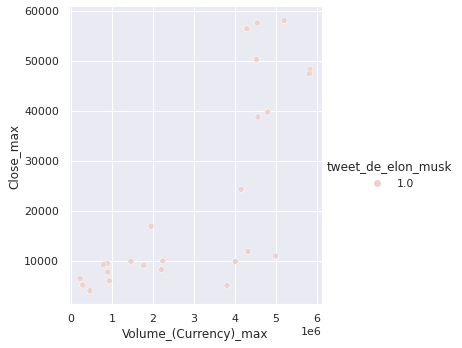

In [ ]:
sns.relplot(x="Volume_(Currency)_max", y="Close_max", data=dfMaxMin_perDay, hue = "tweet_de_elon_musk")

Há muitos poucos tweets, mas claramente parece não ter

In [ ]:
# sns.pairplot(dfMaxMin_perDay[dfMaxMin_perDay.columns[-3:]], hue = "tweet_de_elon_musk")

Depois, usar um hue de análise de sentimentos médio (categorias: positivo/neutro/negativo)

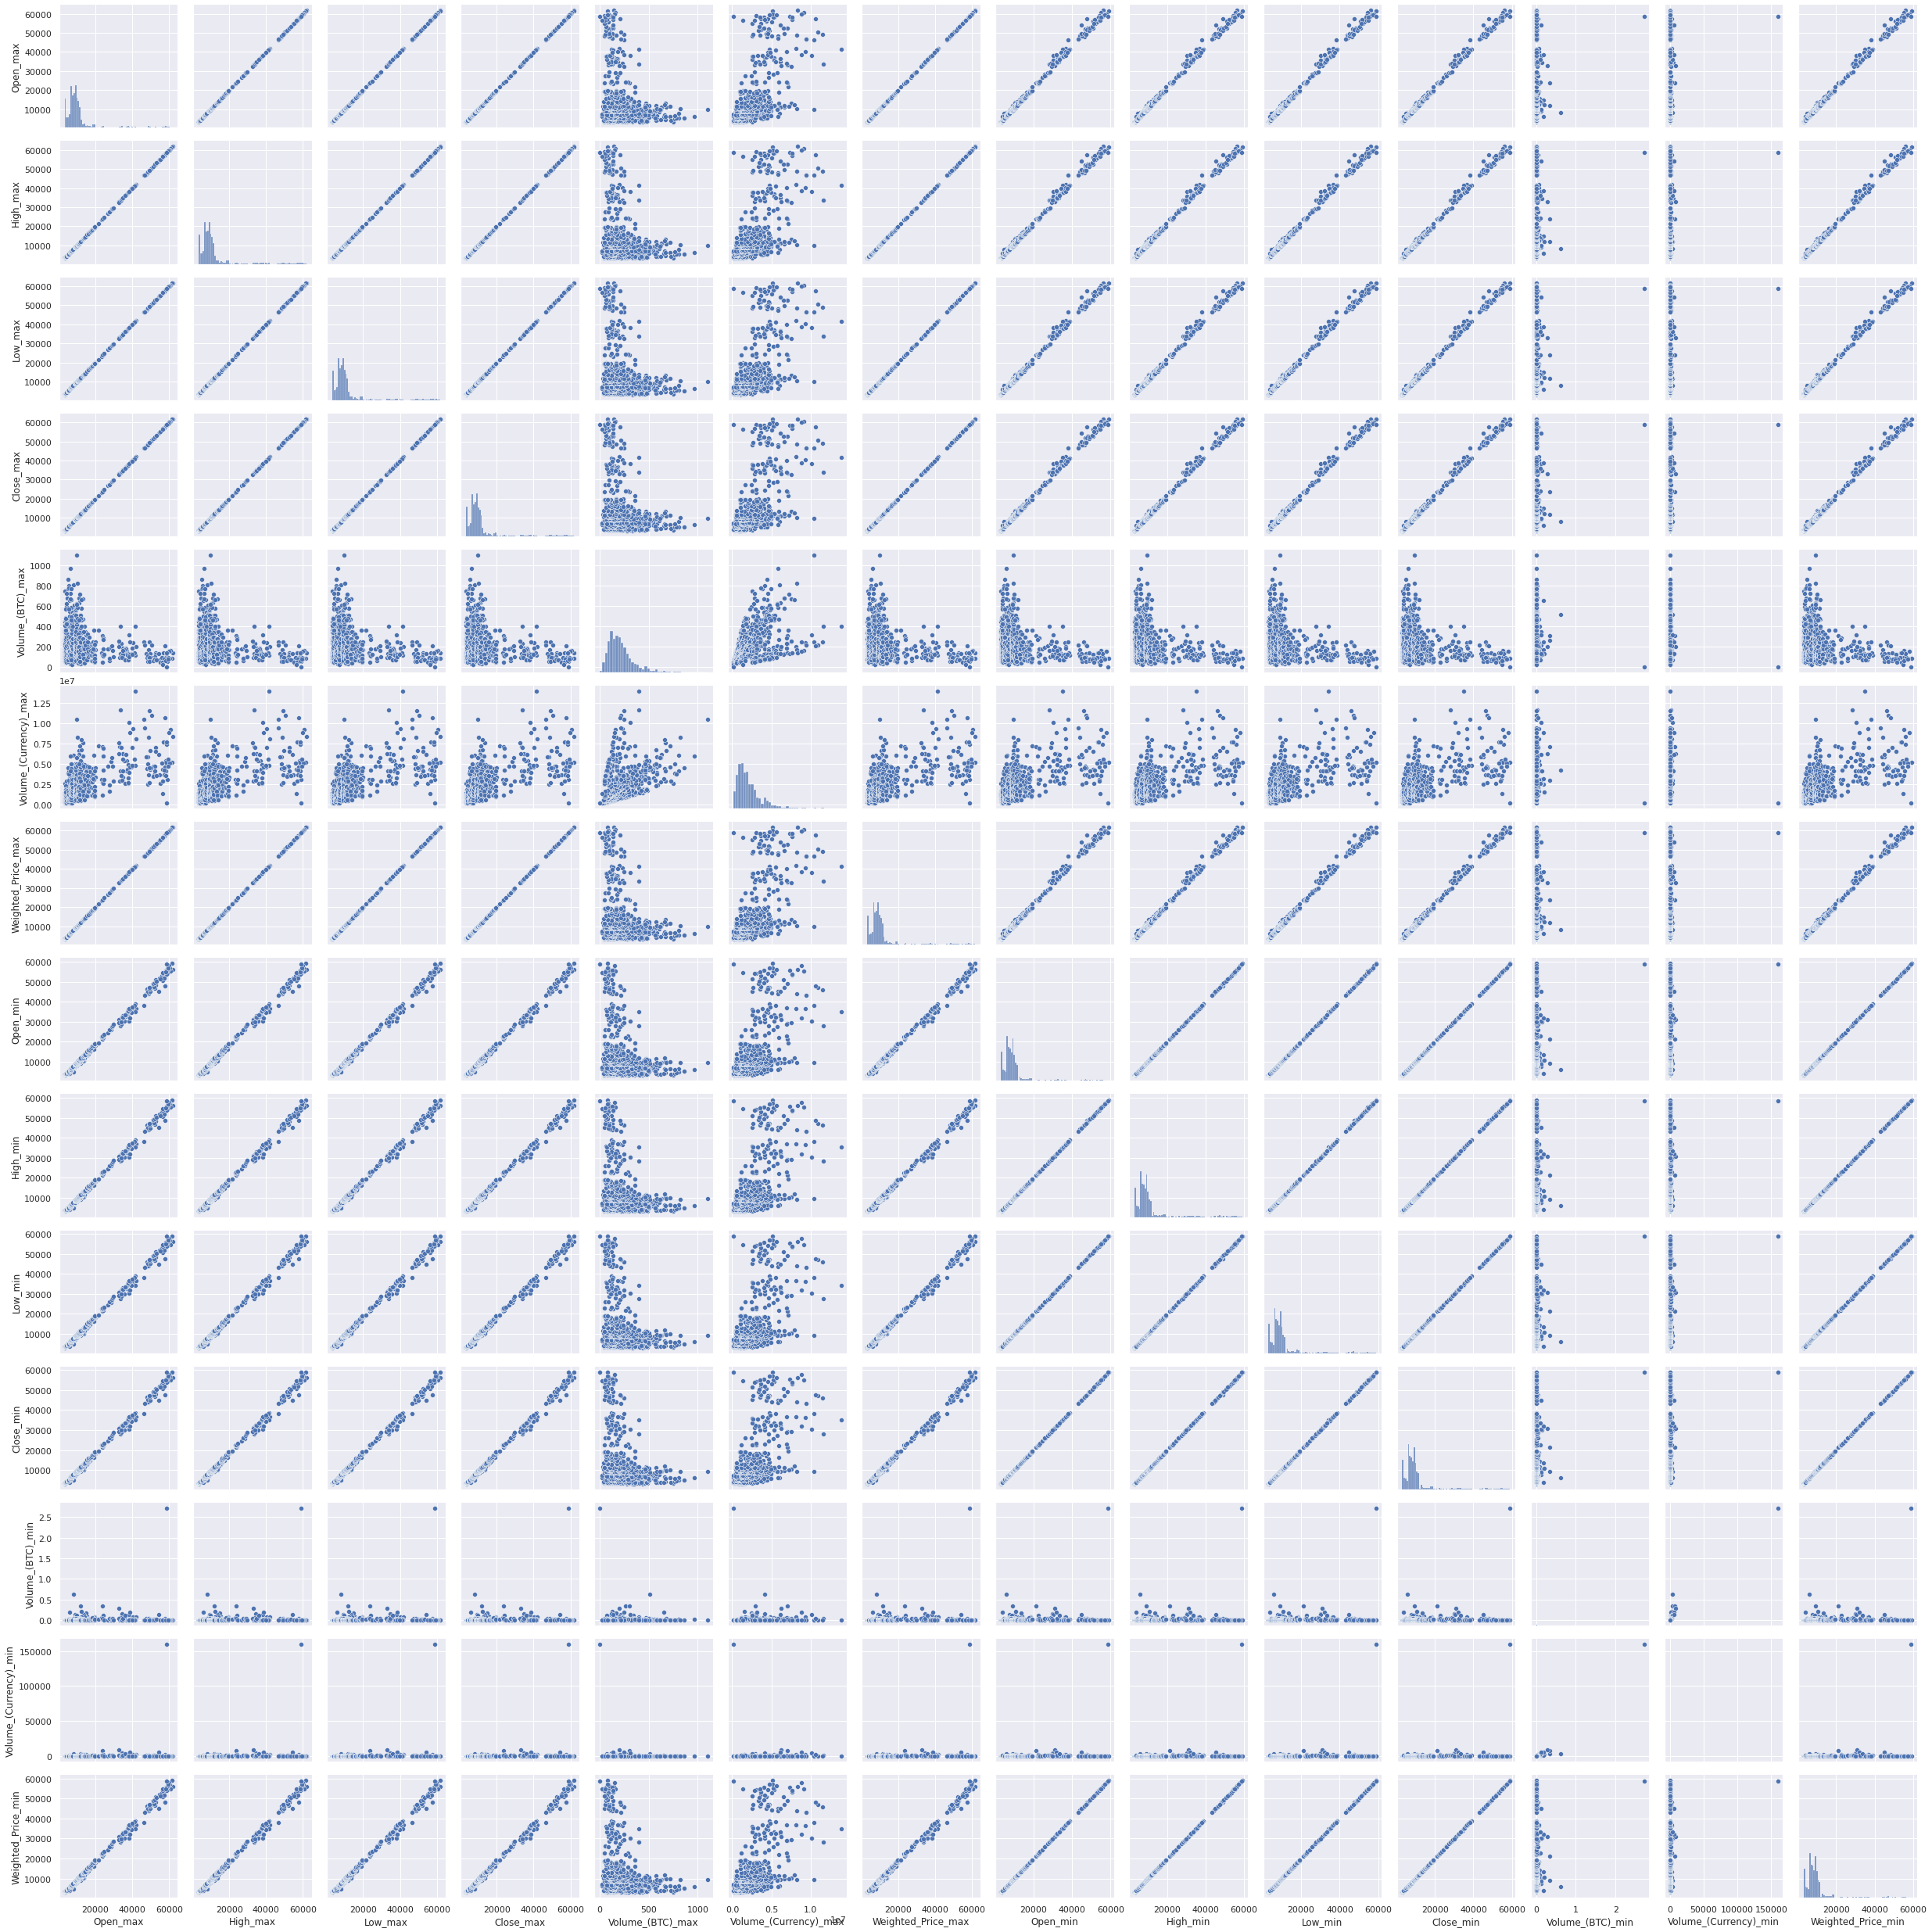

In [ ]:
sns.pairplot(dfMaxMin_perDay[dfMaxMin_perDay.columns[:-1]])

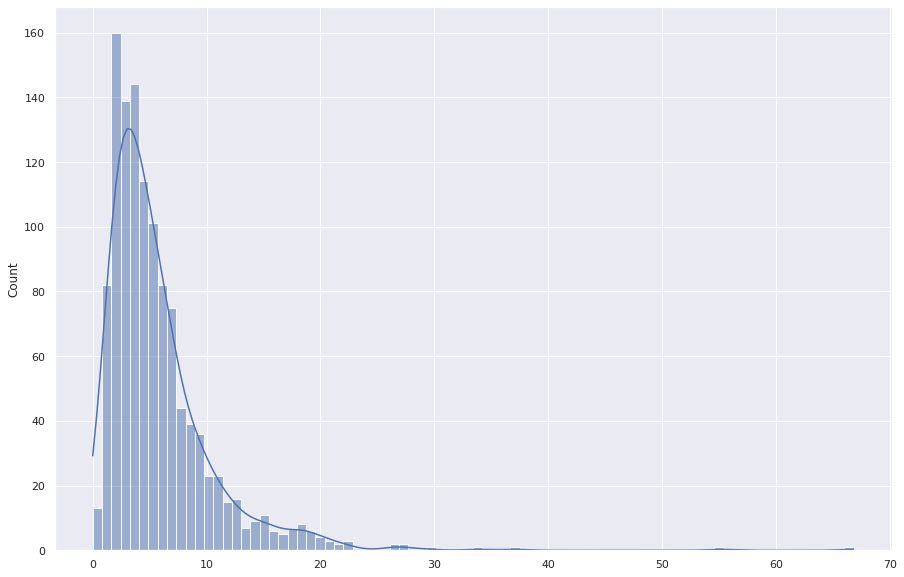

In [ ]:
#variação percentual 
sns.histplot(x = ((dfMaxMin_perDay['Close_max'] - dfMaxMin_perDay['Open_min']) / dfMaxMin_perDay['Open_min']) * 100, kde = True)

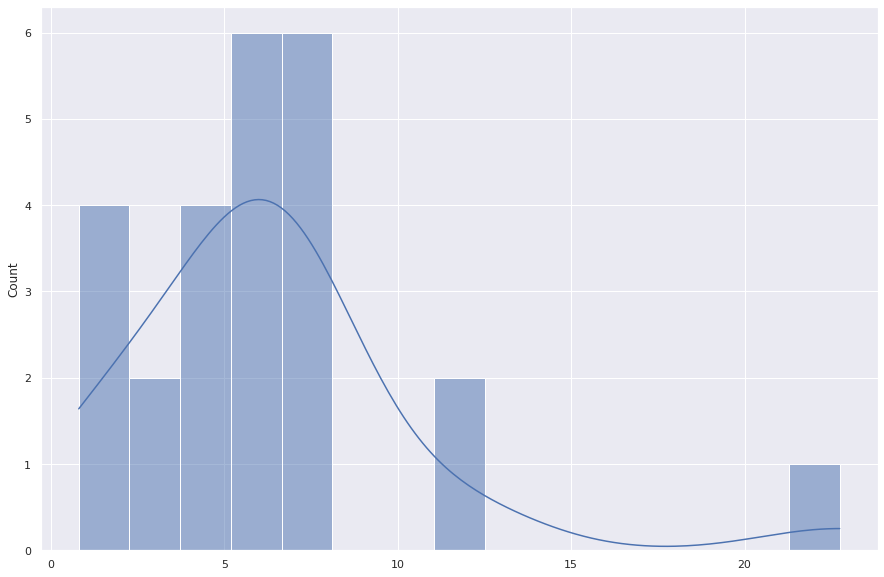

In [ ]:
sns.histplot( x = ((dfMaxMin_perDay_OnlyOnTweets['Close_max'] - dfMaxMin_perDay_OnlyOnTweets['Open_min']) / dfMaxMin_perDay_OnlyOnTweets['Open_min']) * 100,  kde=True);

Aparenta o mesmo comprotamento, logo ele não teria influência sobre o mercado de bitcoin.

In [ ]:
crypots = ((dfMaxMin_perDay_OnlyOnTweets['Close_max'] - dfMaxMin_perDay_OnlyOnTweets['Open_min']) / dfMaxMin_perDay_OnlyOnTweets['Open_min']) * 100
crypots.values

array([ 7.39628821, 12.36959578,  6.33044081,  2.84225466,  6.36513794,
        0.79879444,  2.65875065, 22.74127012,  1.44937301,  4.81371156,
        6.75443096,  1.82770942,  5.09448742,  7.47090019,  1.37425048,
        6.34024092,  5.0038802 ,  6.76774885,  6.04638391,  6.96525804,
        8.05835501, 11.11686767,  6.13316855,  6.59953347,  5.1571823 ])

In [ ]:
mediaPop = ((dfMaxMin_perDay['Close_max'] - dfMaxMin_perDay['Open_min']) / dfMaxMin_perDay['Open_min']) * 100
mediaPop

Date
2018-01-01     8.578583
2018-01-02    17.874898
2018-01-03     6.107980
2018-01-04     8.473497
2018-01-05    15.387415
                ...    
2021-03-27     4.809519
2021-03-28     3.412343
2021-03-29     6.171779
2021-03-30     4.124824
2021-03-31     0.017748
Length: 1186, dtype: float64

In [ ]:
mediaPop = np.mean(mediaPop)
mediaPop

5.769817666730019

In [ ]:
mediaAmostragem = sum(crypots.values)/len(crypots.values)
mediaAmostragem

6.339040581777649

In [ ]:
#Teste t 

#H0
#: a média da amostra é igual à média da referência (ou população).
#H1
#: a média da amostra é diferente à média da referência (ou população).

#https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.ttest_1samp.html#scipy.stats.ttest_1samp
#http://www.cpaqv.org/estatistica/tabelas_cpaqv.pdf
from scipy import stats

#grau de Liberdade
result = stats.ttest_1samp(crypots.values,mediaPop)
result.pvalue, result.statistic


(0.5248955644802022, 0.6452354508436751)

In [ ]:
#Hipotese nula não pode ser rejeitada
result.pvalue < 0.05

False

### Análise dos tweets usando análise de sentimento VADER

In [ ]:
sentimental = [sentiment_scores(i) for i in dfElonMusk_Bitcoin['tweet']]

In [ ]:
dfElonMusk_Bitcoin['tweet'][3]

'@cheresh @andrestaltz End-to-end encryption encoded at firmware level. Unlikely to be hacked w current computing tech. If it is (and we learn about it), a crypto fix will go out immediately via network-wide firmware update.'

In [ ]:
for i in range(dfElonMusk_Bitcoin['tweet'].shape[0]):
    tw = dfElonMusk_Bitcoin['tweet'][i]
    print(f"Tweet {i + 1}: {sentimental[i]}: {tw}")

Tweet 1: Neutral: @vicentes @Grimezsz Wanna buy some Bitcoin? 😉😉  https://t.co/9ZbBJ5fuVq
Tweet 2: Neutral: @CryptoAlesio Yo
Tweet 3: Neutral: Cryptocandy
Tweet 4: Negative: @cheresh @andrestaltz End-to-end encryption encoded at firmware level. Unlikely to be hacked w current computing tech. If it is (and we learn about it), a crypto fix will go out immediately via network-wide firmware update.
Tweet 5: Positive: @DeadlyBananas @MichaelAVaughn Not sure. I let @jack know, but it’s still going. I literally own zero cryptocurrency, apart from .25 BTC that a friend sent me many years ago.
Tweet 6: Positive: But wait, there’s more: the flamethrower is sentient, its safe word is “cryptocurrency” and it comes with a free blockchain
Tweet 7: Neutral: @CryptoNekoZ @Tesla Click checkbox under “Advanced Settings”
Tweet 8: Positive: @CryptoCobain Cryptocurrency is my safe word
Tweet 9: Positive: @Tom_Heats Dogecoin might be my fav cryptocurrency. It’s pretty cool.
Tweet 10: Positive: @coindesk Tha

In [ ]:
dfSentimento = dfElonMusk_Bitcoin.copy().sort_index()
dfSentimento["Sentimento"] = sentimental

In [ ]:
dfMaxMin_perDay_OnlyOnTweets["variacao"] = ((dfMaxMin_perDay_OnlyOnTweets['Close_max'] - dfMaxMin_perDay_OnlyOnTweets['Open_min'])*100/ dfMaxMin_perDay_OnlyOnTweets['Open_min']).values

In [ ]:
dfSentimento["variacao"] = dfMaxMin_perDay_OnlyOnTweets["variacao"]

In [ ]:
dfSentimento

,nretweets,nlikes,tweet,nreplies,Sentimento,variacao
2018-01-29,15744,105075,"But wait, there’s more: the flamethrower is se...",2510,Neutral,7.396288
2018-01-29,15744,105075,"But wait, there’s more: the flamethrower is se...",2510,Neutral,7.396288
2018-01-29,15538,104224,"But wait, there’s more: the flamethrower is se...",2492,Neutral,7.396288
2018-01-29,15744,105075,"But wait, there’s more: the flamethrower is se...",2510,Negative,7.396288
2018-02-22,120,1161,@DeadlyBananas @MichaelAVaughn Not sure. I let...,161,Positive,12.369596
...,...,...,...,...,...,...
2021-02-20,10548,86076,@PeterSchiff An email saying you have gold is ...,2926,Neutral,6.133169
2021-02-20,24313,154807,Cryptocurrency explained https://t.co/kUXaXx8a1R,11112,Neutral,6.133169
2021-02-20,21597,278356,Heard a rumor some crypto coin was pegging the...,17594,Negative,6.133169
2021-03-02,17037,200272,Scammers &amp; crypto should get a room,9585,Positive,6.599533


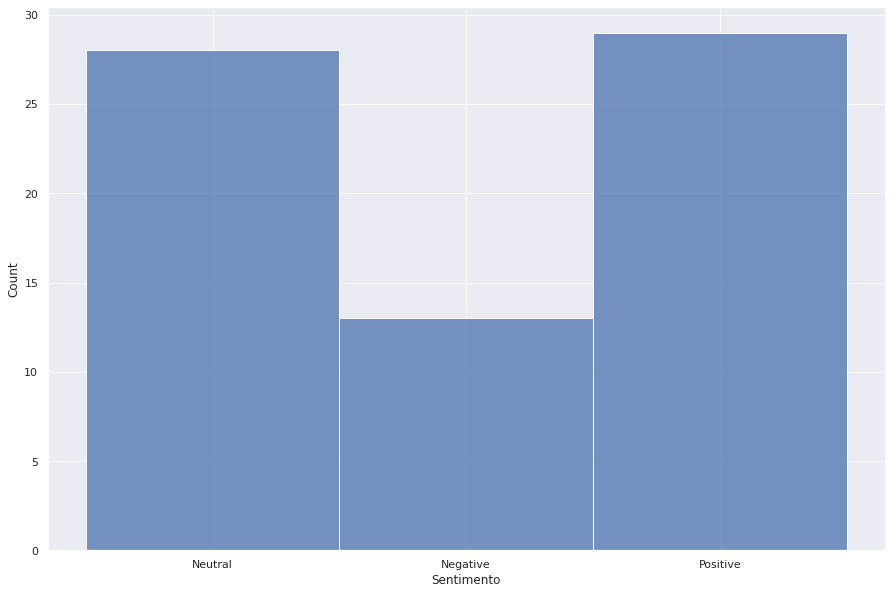

In [ ]:
sns.histplot(data = dfSentimento["Sentimento"]);

In [ ]:
dfSentimento.groupby("Sentimento").mean()

,nretweets,nlikes,nreplies,variacao
Sentimento,,,,
Negative,5848.538462,65810.846154,2948.076923,4.724522
Neutral,8461.214286,55671.607143,2198.607143,6.278114
Positive,4929.310345,49734.344828,1910.551724,7.238523


In [ ]:
#Media das variações para tipo de sentimento
{"Media "+i:dfSentimento.loc[dfSentimento['Sentimento']==i,"variacao"].mean() for i in dfSentimento['Sentimento'].unique()}

{'Media Negative': 7.224281571761069,
 'Media Neutral': 6.94200142883734,
 'Media Positive': 5.861655079371804}

## Base de bitcoins geral

A base é grande, mais de 1 milhão de tweets, estou pegando aprox. 1% por enquanto

Essa base só começou a ser pega no começo de 2021, a outra é maior e de 2016-2019, provavelmente vamos juntar as duas

## Pre-Processamento

In [ ]:
import random

p = 0.01

In [ ]:
df_bitcoinGeral = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Dataset/Bitcoin_tweets.csv", skiprows=lambda i: i>0 and random.random() > p)

In [ ]:
df_bitcoinGeral.dtypes # precisamos converter as columnas numéricas para numeros depois

user_name            object
user_location        object
user_description     object
user_created         object
user_followers      float64
user_friends        float64
user_favourites     float64
user_verified          bool
date                 object
text                 object
hashtags             object
source               object
is_retweet             bool
dtype: object

In [ ]:
df_bitcoinGeral

,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,source,is_retweet
0,Opportunity (Korea),NaN,This is an informational account about Opportu...,2020-11-18 04:32:52,118.0,1.0,6.0,False,2021-02-10 22:58:59,"$BTC bounce fail. I know, I mentioned about u...",NaN,Twitter for iPhone,False
1,Anthony,"Toronto, Ontario",29 // And I oop. Want your piece of the #Bitco...,2009-03-05 14:50:18,1170.0,466.0,2594.0,False,2021-02-10 22:14:00,Love this community! #Bitcoin #BTC #ForThePeop...,"['Bitcoin', 'BTC', 'ForThePeople', 'WSB', 'BANG']",Twitter for iPhone,False
2,Binance Coin Tracker,NaN,Your buddy to find the best trade opportunitie...,2018-01-09 10:08:01,204.0,72.0,1.0,False,2021-02-10 21:05:01,🤩$BTCST 🤩Buy Signal\n▶Pair: BTCST/BTC \n🚦Signa...,"['btc', 'bitcoin']",Genius Crypto,False
3,Jordy,NaN,NaN,2021-01-30 14:44:31,1.0,7.0,1.0,False,2021-02-10 20:55:02,Bitvavo is the #1 crypto trading platform for ...,NaN,Twitter for iPhone,False
4,PiRoyot,NaN,Test Twitter Bot for Pi,2020-06-07 10:46:59,1.0,0.0,0.0,False,2021-02-10 19:00:02,Market Id : BTC-AUD\nLast Price :58699.2\n24 H...,"['btc', 'bitcoin']",HashTagTrendRoy,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
12538,Bang Pateng | Airdrop | AMA | Trading,NaN,Bang Pateng - Indonesian cryptocurrency commun...,2018-01-11 10:15:21,3279.0,934.0,983.0,False,2021-09-10 22:05:39,We will hold an #AMA with \n@standarddefi \n \...,"['AMA', 'BNB', 'Ethereum', 'BTC']",Twitter Web App,False
12539,DΞFi Pig,NaN,Passionate about DeFi + NFTs || Daily Crypto P...,2021-05-31 23:31:32,2869.0,889.0,3819.0,False,2021-09-10 21:40:15,🔔 CURRENT PRICE ALERT 🔔\n\n1️⃣ $DPI #DeFiPulse...,"['DeFiPulse', 'MetaVerse', 'BTC', 'ETH']",DeFiPig,False
12540,satoshi_LN_bot,100 Sats per person 24/7,"Live Balance: 1,256,971 Sats | Paid: 804,158 |...",2021-06-19 17:59:57,1856.0,6.0,653.0,False,2021-09-10 21:34:03,"@FWilhelmV ✅ PAID 1,000 Satoshi / .00001000 #B...",['BTC'],Satoshi_9,False
12541,King_Cr88d 👑,$Creed Finance AB Canada🍁,$Creed Finance now offer 130% Apy staking. Dir...,2020-08-23 21:05:15,1239.0,1781.0,14841.0,False,2021-09-10 21:32:48,@CryptoMichNL #CreedX is more superior than yo...,"['CreedX', 'TRX', 'safemoneytrx', 'CFB', 'Safe...",Twitter for Android,False


In [ ]:
colunas_relevantes = ["user_followers", "user_friends", "user_favourites", "user_verified", "date", "text", "hashtags", "is_retweet"]

In [ ]:
df_bitcoinGeral = df_bitcoinGeral[colunas_relevantes]
df_bitcoinGeral = df_bitcoinGeral.sort_values(by="date")

In [ ]:
df_bitcoinGeral['date'].count() # há algumas entradas com NaT (entra nula de data, como iremos transformar a data para o index, tiramos essas linhas)

12543

In [ ]:
df_bitcoinGeral['date'] = pd.to_datetime(df_bitcoinGeral['date'], errors = "coerce")

In [ ]:
df_bitcoinGeral = df_bitcoinGeral.dropna(axis = 0, how = "any", subset = ["date"])

In [ ]:
df_bitcoinGeral = df_bitcoinGeral.rename(columns={"date": "Date"})

In [ ]:
df_bitcoinGeral = df_bitcoinGeral.set_index("Date")

In [ ]:
# talvez parse json str -> python list

In [ ]:
numerical_columns = ["user_followers", "user_friends", "user_favourites"]

In [ ]:
def custom_to_int(x):
    return pd.to_numeric(x, downcast="integer", errors="coerce")

In [ ]:
df_bitcoinGeral[numerical_columns] = df_bitcoinGeral[numerical_columns].apply(custom_to_int)

In [ ]:
bool_columns = ["user_verified", "is_retweet"]

In [ ]:
for boolcolumn in bool_columns:
    df_bitcoinGeral[boolcolumn] = df_bitcoinGeral[boolcolumn].astype(bool)

In [ ]:
df_bitcoinGeral

,user_followers,user_friends,user_favourites,user_verified,text,hashtags,is_retweet
Date,,,,,,,
2021-02-05 12:00:07,3510,0,0,False,"Bitcoin - BTC\nPrice: $37,605.44\nChange in 1h...","['Bitcoin', 'BTC']",False
2021-02-05 12:29:08,4093,426,19448,False,"🔼🔼 ₿1 = $37,950 (12:25 UTC)\n$BTC prices conti...","['Bitcoin', 'btcusd']",False
2021-02-05 13:00:01,1166,64,297,False,#BTCUSD #BTC #Bitcoin #ETHUSD #ETH #Ether...,"['BTCUSD', 'BTC', 'Bitcoin', 'ETHUSD', 'ETH', ...",False
2021-02-05 13:20:30,28,0,0,False,➡️Register &amp; complete the #KYC verificatio...,['KYC'],False
2021-02-05 13:22:11,10900,5197,82709,False,$MBLV new #crypto #platform https://t.co/7QArf...,"['crypto', 'platform']",False
...,...,...,...,...,...,...,...
2021-09-10 23:46:28,81,149,5459,False,A Jewel that not only shines but also rewards ...,"['Ethereum', 'IT', 'MXS', 'bitcoinmining', 'cr...",False
2021-09-10 23:46:41,7903,105,135,False,MoonWorthy Now Listed on COINHOT\n https://t.c...,"['GIVEAWAY', 'CryptoNews', 'BSCGEMS', 'AIRDROP...",False
2021-09-10 23:47:59,222,105,1861,False,Stop retweeting tweets of accounts who giveawa...,['Bitcoin'],False


In [ ]:
df_bitcoinGeral.dtypes # agora os tipos estão conforme o esperado

user_followers      int32
user_friends        int32
user_favourites     int32
user_verified        bool
text               object
hashtags           object
is_retweet           bool
dtype: object

In [ ]:
df_bitcoinGeral["hashtags"] = df_bitcoinGeral["hashtags"].astype(str)

Fazendo uma limpeza agressiva (dropar todas as linhas que tenham uma valor qualquer nulo), a única coluna que tem valores nulos é a de "hashtag" o que tudo bem

In [ ]:
df_bitcoinGeral.dropna()
# o tamanho não se modifica (se tirarmos o subset e a conversão das hashtags acima sim, porque há tweets sem hashtags)
# cerca de 1% dos tweets não usa hashtag, isso talvez sugira que a base foi coletada com alguma heurística de hashtags

,user_followers,user_friends,user_favourites,user_verified,text,hashtags,is_retweet
Date,,,,,,,
2021-02-05 12:00:07,3510,0,0,False,"Bitcoin - BTC\nPrice: $37,605.44\nChange in 1h...","['Bitcoin', 'BTC']",False
2021-02-05 12:29:08,4093,426,19448,False,"🔼🔼 ₿1 = $37,950 (12:25 UTC)\n$BTC prices conti...","['Bitcoin', 'btcusd']",False
2021-02-05 13:00:01,1166,64,297,False,#BTCUSD #BTC #Bitcoin #ETHUSD #ETH #Ether...,"['BTCUSD', 'BTC', 'Bitcoin', 'ETHUSD', 'ETH', ...",False
2021-02-05 13:20:30,28,0,0,False,➡️Register &amp; complete the #KYC verificatio...,['KYC'],False
2021-02-05 13:22:11,10900,5197,82709,False,$MBLV new #crypto #platform https://t.co/7QArf...,"['crypto', 'platform']",False
...,...,...,...,...,...,...,...
2021-09-10 23:46:28,81,149,5459,False,A Jewel that not only shines but also rewards ...,"['Ethereum', 'IT', 'MXS', 'bitcoinmining', 'cr...",False
2021-09-10 23:46:41,7903,105,135,False,MoonWorthy Now Listed on COINHOT\n https://t.c...,"['GIVEAWAY', 'CryptoNews', 'BSCGEMS', 'AIRDROP...",False
2021-09-10 23:47:59,222,105,1861,False,Stop retweeting tweets of accounts who giveawa...,['Bitcoin'],False


In [ ]:
df_bitcoinGeral = df_bitcoinGeral.set_index(pd.to_datetime(df_bitcoinGeral.index.date))

In [ ]:
df_bitcoinGeral.index.name = 'Date'

In [ ]:
valid_days = set(df_bitcoinGeral.index)

In [ ]:
len(valid_days)

78

In [ ]:
pd.to_datetime("2021-02-05") in valid_days

True

In [ ]:
pd.to_datetime("2021-02-11") in valid_days # há dias sem tweet?

False

In [ ]:
df_bitcoinGeral.index

DatetimeIndex(['2021-02-05', '2021-02-05', '2021-02-05', '2021-02-05',
               '2021-02-05', '2021-02-05', '2021-02-05', '2021-02-05',
               '2021-02-05', '2021-02-05',
               ...
               '2021-09-10', '2021-09-10', '2021-09-10', '2021-09-10',
               '2021-09-10', '2021-09-10', '2021-09-10', '2021-09-10',
               '2021-09-10', '2021-09-10'],
              dtype='datetime64[ns]', name='Date', length=12543, freq=None)

## Base Bitcoins Geral Analise Sentimento

In [ ]:
%%time
sentimental_geral = [sentiment_scores(i) for i in df_bitcoinGeral['text']]

CPU times: user 2min 33s, sys: 8.27 s, total: 2min 41s
Wall time: 2min 43s


In [ ]:
# talvez tweets com sentimento positivo são mais influentes/mais favoritados?

In [ ]:
df_bitcoinGeral["sentimento"] = sentimental_geral

In [ ]:
df_bitcoinGeral

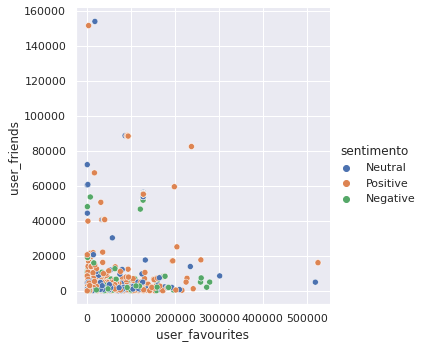

In [ ]:
sns.relplot(x="user_favourites", y="user_friends", data=df_bitcoinGeral, hue = "sentimento")

CPU times: user 4.4 s, sys: 236 ms, total: 4.64 s
Wall time: 4.44 s


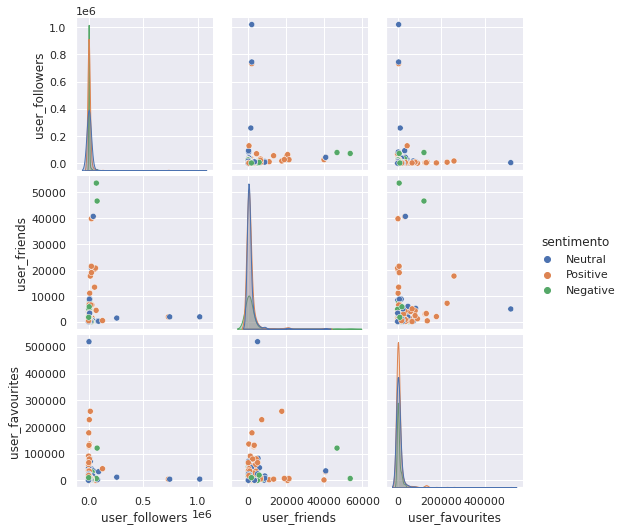

In [ ]:
%%time
sns.pairplot(df_bitcoinGeral[["user_followers", "user_friends", "user_favourites", "sentimento"]].reset_index().iloc[0:1000], hue = "sentimento")

CPU times: user 13 s, sys: 507 ms, total: 13.5 s
Wall time: 13.4 s


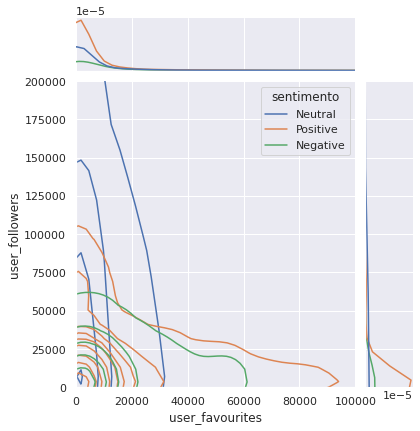

In [ ]:
%%time
sns.jointplot(data=df_bitcoinGeral[["user_followers", "user_friends", "user_favourites", "sentimento"]].reset_index().iloc[0:10000],
              x="user_favourites", y="user_followers", hue="sentimento", kind="kde", xlim=[0, 100000], ylim=[0, 0.2e6])

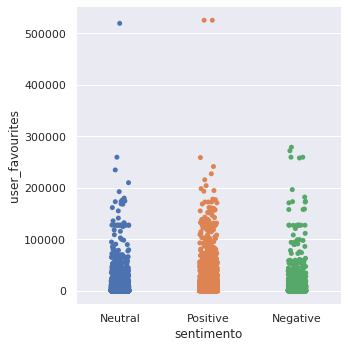

In [ ]:
sns.catplot(x="sentimento", y="user_favourites", data=df_bitcoinGeral[["user_followers", "user_friends", "user_favourites", "sentimento"]].reset_index().iloc[0:10000])

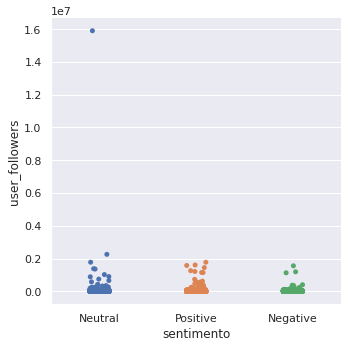

In [ ]:
sns.catplot(x="sentimento", y="user_followers", data=df_bitcoinGeral[["user_followers", "user_friends", "user_favourites", "sentimento"]].reset_index().iloc[0:10000])

In [ ]:
df_bitcoinGeral["isPositive"] = df_bitcoinGeral["sentimento"] == "Positive"
df_bitcoinGeral["isNeutral"] = df_bitcoinGeral["sentimento"] == "Neutral"
df_bitcoinGeral["isNegative"] = df_bitcoinGeral["sentimento"] == "Negative"

In [ ]:
df_bitcoinSentimentos = df_bitcoinGeral.groupby("Date").sum()[["isPositive", "isNeutral", "isNegative"]]

In [ ]:
df_bitcoinSentimentos

,isPositive,isNeutral,isNegative
Date,,,
2021-02-05,8,11,3
2021-02-06,18,16,10
2021-02-07,15,11,6
2021-02-08,27,28,15
2021-02-09,22,19,4
...,...,...,...
2021-08-23,50,33,15
2021-08-24,130,81,42
2021-08-25,320,112,58


In [ ]:
dfMaxMin_perDay["isPositive"] = df_bitcoinSentimentos["isPositive"]
dfMaxMin_perDay["isNeutral"] = df_bitcoinSentimentos["isNeutral"]
dfMaxMin_perDay["isNegative"] = df_bitcoinSentimentos["isNegative"]

In [ ]:
df_bitcoinSentimentos = df_bitcoinSentimentos.set_index(df_bitcoinSentimentos.index.astype(str))

In [ ]:
set(df_bitcoinSentimentos.index).intersection(set(dfMaxMin_perDay.index))

set()

A base selecionada de tweets gerais não tem interseção com a base do preço do bitcoin, combinar com a outra base (de 2016-2019)

In [ ]:
# não alterado abaixo

### Análise para DogeCoin


In [ ]:
#tratar as coisas da dogecoin como fiz com elon musk
#https://www.kaggle.com/dhruvildave/dogecoin-historical-data
doge = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Dataset/DOGE-USD.csv')
doge


,Date,Open,High,Low,Close,Adj Close,Volume
0,2014-09-17,0.000293,0.000299,0.000260,0.000268,0.000268,1.463600e+06
1,2014-09-18,0.000268,0.000325,0.000267,0.000298,0.000298,2.215910e+06
2,2014-09-19,0.000298,0.000307,0.000275,0.000277,0.000277,8.835630e+05
3,2014-09-20,0.000276,0.000310,0.000267,0.000292,0.000292,9.930040e+05
4,2014-09-21,0.000293,0.000299,0.000284,0.000288,0.000288,5.391400e+05
...,...,...,...,...,...,...,...
2573,2021-10-03,0.218811,0.226228,0.215872,0.221748,0.221748,1.070268e+09
2574,2021-10-04,0.221930,0.247924,0.213284,0.240852,0.240852,3.684051e+09
2575,2021-10-05,0.241240,0.267787,0.233588,0.252016,0.252016,4.628329e+09
2576,2021-10-06,0.252008,0.271509,0.243096,0.255134,0.255134,4.659725e+09


In [ ]:
doge.isnull().sum()

Date         0
Open         4
High         4
Low          4
Close        4
Adj Close    4
Volume       4
dtype: int64

In [ ]:
doge = doge.dropna(how="all",subset=doge.columns[1:])
doge

,Date,Open,High,Low,Close,Adj Close,Volume
0,2014-09-17,0.000293,0.000299,0.000260,0.000268,0.000268,1.463600e+06
1,2014-09-18,0.000268,0.000325,0.000267,0.000298,0.000298,2.215910e+06
2,2014-09-19,0.000298,0.000307,0.000275,0.000277,0.000277,8.835630e+05
3,2014-09-20,0.000276,0.000310,0.000267,0.000292,0.000292,9.930040e+05
4,2014-09-21,0.000293,0.000299,0.000284,0.000288,0.000288,5.391400e+05
...,...,...,...,...,...,...,...
2573,2021-10-03,0.218811,0.226228,0.215872,0.221748,0.221748,1.070268e+09
2574,2021-10-04,0.221930,0.247924,0.213284,0.240852,0.240852,3.684051e+09
2575,2021-10-05,0.241240,0.267787,0.233588,0.252016,0.252016,4.628329e+09
2576,2021-10-06,0.252008,0.271509,0.243096,0.255134,0.255134,4.659725e+09


In [ ]:
#olhando apenas em 2021
dataIni='2021-1-1'
#data final
dataFim='2021-10-1'



In [ ]:
dfResumido = doge.copy()

dfResumido = dfResumido.rename(columns={"Date": "date"})

dfResumido["date"]  = pd.to_datetime(dfResumido['date'])
dfResumido = dfResumido.loc[(dfResumido['date'] >=dataIni)& (dfResumido['date'] <=dataFim) ] 
dfResumido["date"]  = pd.to_datetime(dfResumido['date'])

dfResumido

,date,Open,High,Low,Close,Adj Close,Volume
2298,2021-01-01,0.004681,0.005685,0.004615,0.005685,0.005685,2.289615e+08
2299,2021-01-02,0.005686,0.013698,0.005584,0.010615,0.010615,3.421563e+09
2300,2021-01-03,0.010602,0.013867,0.009409,0.009771,0.009771,2.707004e+09
2301,2021-01-04,0.009785,0.011421,0.007878,0.009767,0.009767,1.372399e+09
2302,2021-01-05,0.009767,0.010219,0.008972,0.009920,0.009920,6.872561e+08
...,...,...,...,...,...,...,...
2567,2021-09-27,0.205241,0.209281,0.200078,0.200262,0.200262,8.382972e+08
2568,2021-09-28,0.200001,0.202579,0.196352,0.196804,0.196804,8.663012e+08
2569,2021-09-29,0.196980,0.204144,0.195042,0.198876,0.198876,9.267371e+08
2570,2021-09-30,0.198869,0.205806,0.197855,0.204244,0.204244,9.168198e+08


In [ ]:
#leitura da base 
# https://www.kaggle.com/ayhmrba/elon-musk-tweets-2010-2021
dfElonMusk = pd.read_csv('https://drive.google.com/uc?export=download&id=17S6ha416OK2C8_s8T4nD6REsUxVZdfCe')

In [ ]:
# convert to datetime
dfElonMusk["date"] = pd.to_datetime(dfElonMusk["date"])
# set indest date
dfElonMusk = dfElonMusk.set_index("date")
# rename column date
dfElonMusk = dfElonMusk.rename_axis(index="Date")

In [ ]:
#set index to date
dfElonMusk.index = dfElonMusk.index.date

In [ ]:
dfElonMusk = dfElonMusk.rename_axis(index="date")
# set indest date


In [ ]:
dfElonMusk['date']

Index([2010-06-04, 2011-12-28, 2011-12-27, 2011-12-26, 2011-12-26, 2011-12-26,
       2011-12-26, 2011-12-26, 2011-12-26, 2011-12-24,
       ...
       2011-12-21, 2011-12-21, 2011-12-21, 2011-12-21, 2011-12-04, 2011-12-03,
       2011-12-03, 2011-12-01, 2011-12-01, 2010-06-04],
      dtype='object', name='date', length=43074)

In [ ]:
#Colunas/atributo
dfElonMusk.columns

Index(['id', 'conversation_id', 'created_at', 'timezone', 'place', 'tweet',
       'language', 'hashtags', 'cashtags', 'user_id', 'user_id_str',
       'username', 'name', 'day', 'hour', 'link', 'urls', 'photos', 'video',
       'thumbnail', 'retweet', 'nlikes', 'nreplies', 'nretweets', 'quote_url',
       'search', 'near', 'geo', 'source', 'user_rt_id', 'user_rt',
       'retweet_id', 'reply_to', 'retweet_date', 'translate', 'trans_src',
       'trans_dest', 'filename'],
      dtype='object')

In [ ]:
#Drop na all  vertical axis 
dfElonMusk = dfElonMusk.dropna(how="all", axis = 1)
dfElonMusk

,id,conversation_id,created_at,timezone,tweet,language,hashtags,cashtags,user_id,user_id_str,username,name,day,hour,link,urls,photos,video,thumbnail,retweet,nlikes,nreplies,nretweets,quote_url,search,reply_to,filename
date,,,,,,,,,,,,,,,,,,,,,,,,,,,
2010-06-04,15434727182,15434727182,1.275676e+12,0,"Please ignore prior tweets, as that was someon...",en,[],[],44196397,44196397,elonmusk,Elon Musk,5,18,https://twitter.com/elonmusk/status/15434727182,[],[],0,NaN,False,4652,391,348,NaN,None,[],/content/drive/MyDrive/Residencia Visao Comput...
2011-12-28,152153637639028736,152151847614943233,1.325111e+12,0,@TheOnion So true :),en,[],[],44196397,44196397,elonmusk,Elon Musk,3,22,https://twitter.com/elonmusk/status/1521536376...,[],[],0,NaN,False,12,7,1,NaN,None,[],/content/drive/MyDrive/Residencia Visao Comput...
2011-12-27,151809315026636800,151809315026636800,1.325029e+12,0,If you ever wanted to know the *real* truth ab...,en,[],[],44196397,44196397,elonmusk,Elon Musk,2,23,https://twitter.com/elonmusk/status/1518093150...,['http://j.mp/vLhhov'],[],0,NaN,False,39,13,34,NaN,None,[],/content/drive/MyDrive/Residencia Visao Comput...
2011-12-26,151338939389706242,151338939389706242,1.324917e+12,0,Walked around a neighborhood recently rebuilt ...,en,[],[],44196397,44196397,elonmusk,Elon Musk,1,16,https://twitter.com/elonmusk/status/1513389393...,[],['https://pbs.twimg.com/media/Ahmp9qtCAAAYPDX....,1,https://pbs.twimg.com/media/Ahmp9qtCAAAYPDX.jpg,False,155,9,18,NaN,None,[],/content/drive/MyDrive/Residencia Visao Comput...
2011-12-26,151337237429239808,151337237429239808,1.324917e+12,0,"It was Xmas, so we brought presents for the ki...",en,[],[],44196397,44196397,elonmusk,Elon Musk,1,16,https://twitter.com/elonmusk/status/1513372374...,[],['https://pbs.twimg.com/media/AhmoamaCQAANvSt....,1,https://pbs.twimg.com/media/AhmoamaCQAANvSt.jpg,False,158,15,13,NaN,None,[],/content/drive/MyDrive/Residencia Visao Comput...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2011-12-03,142881284019060736,142881284019060736,1.322901e+12,0,That was a total non sequitur btw,en,[],[],44196397,44196397,elonmusk,Elon Musk,6,8,https://twitter.com/elonmusk/status/1428812840...,[],[],0,NaN,False,53,31,6,NaN,None,[],/content/drive/MyDrive/Residencia Visao Comput...
2011-12-03,142880871391838208,142880871391838208,1.322900e+12,0,"Great Voltaire quote, arguably better than Twa...",en,[],[],44196397,44196397,elonmusk,Elon Musk,6,8,https://twitter.com/elonmusk/status/1428808713...,[],[],0,NaN,False,29,7,25,NaN,None,[],/content/drive/MyDrive/Residencia Visao Comput...
2011-12-01,142188458125963264,142188458125963264,1.322735e+12,0,I made the volume on the Model S http://t.co/...,en,[],[],44196397,44196397,elonmusk,Elon Musk,4,10,https://twitter.com/elonmusk/status/1421884581...,['http://ow.ly/i/mtD7'],[],0,NaN,False,78,31,9,NaN,None,[],/content/drive/MyDrive/Residencia Visao Comput...


In [ ]:
#linhas em que são citados o dogecoin
dogeDf = dfElonMusk[dfElonMusk["tweet"].str.contains("dogecoin|doge coin|Dogecoin|Doge coin|doge|Doge|Crypto|Cryptocurrency " , na=False)]

dogeDf


,id,conversation_id,created_at,timezone,tweet,language,hashtags,cashtags,user_id,user_id_str,username,name,day,hour,link,urls,photos,video,thumbnail,retweet,nlikes,nreplies,nretweets,quote_url,search,reply_to,filename
date,,,,,,,,,,,,,,,,,,,,,,,,,,,
2018-05-24,999451013391179776,999450636075778049,1.527123e+12,0,@CryptoAlesio Yo,und,[],[],44196397,44196397,elonmusk,"Elon Musk, the 2nd",4,0,https://twitter.com/elonmusk/status/9994510133...,[],[],0,NaN,False,3258,24,108,NaN,None,[],/content/drive/MyDrive/Residencia Visao Comput...
2018-05-05,992904076978540545,992894802122366976,1.525562e+12,0,Cryptocandy,en,[],[],44196397,44196397,elonmusk,"Elon Musk, the 2nd",6,23,https://twitter.com/elonmusk/status/9929040769...,[],[],0,NaN,False,49948,1860,6765,NaN,None,[],/content/drive/MyDrive/Residencia Visao Comput...
2019-05-07,1125820049439113216,1125819231428169728,1.557251e+12,0,@CryptoNekoZ @Tesla Click checkbox under “Adva...,en,[],[],44196397,44196397,elonmusk,Elon Musk,2,17,https://twitter.com/elonmusk/status/1125820049...,[],[],0,NaN,False,6397,66,222,NaN,None,"[{'screen_name': 'CryptoNekoZ', 'name': 'NekoZ...",/content/drive/MyDrive/Residencia Visao Comput...
2019-04-13,1117100699798478849,1117095713136087040,1.555173e+12,0,@CryptoCobain Cryptocurrency is my safe word,en,[],[],44196397,44196397,elonmusk,Elon Musk,6,16,https://twitter.com/elonmusk/status/1117100699...,[],[],0,NaN,False,8379,324,1772,NaN,None,"[{'screen_name': 'CryptoCobain', 'name': '∞ CO...",/content/drive/MyDrive/Residencia Visao Comput...
2019-04-02,1113178951403180032,1113178951403180032,1.554238e+12,0,Dogecoin value may vary https://t.co/UWerAhPv63,en,[],[],44196397,44196397,elonmusk,Elon Musk,2,20,https://twitter.com/elonmusk/status/1113178951...,['https://www.theonion.com/bitcoin-plunge-reve...,[],0,NaN,False,20160,1080,1959,NaN,None,[],/content/drive/MyDrive/Residencia Visao Comput...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-04-02,1113173498384441344,1113173498384441344,1.554236e+12,0,Dogecoin rulz https://t.co/flWWUgAgLU,ht,[],[],44196397,44196397,elonmusk,Elon Musk,2,20,https://twitter.com/elonmusk/status/1113173498...,[],['https://pbs.twimg.com/media/D3LJZDSUwAABEea....,1,https://pbs.twimg.com/media/D3LJZDSUwAABEea.jpg,False,138893,1732,16539,NaN,None,[],/content/drive/MyDrive/Residencia Visao Comput...
2019-04-02,1113164389929160706,1113145654363119616,1.554234e+12,0,@dogecoin Uh oh,en,[],[],44196397,44196397,elonmusk,Elon Musk,2,19,https://twitter.com/elonmusk/status/1113164389...,[],[],0,NaN,False,15535,217,500,NaN,None,"[{'screen_name': 'dogecoin', 'name': 'Dogecoin...",/content/drive/MyDrive/Residencia Visao Comput...
2019-04-02,1113009339743100929,1113008901497278465,1.554197e+12,0,@Tom_Heats Dogecoin might be my fav cryptocurr...,en,[],[],44196397,44196397,elonmusk,Elon Musk,2,9,https://twitter.com/elonmusk/status/1113009339...,[],[],0,NaN,False,9063,558,2428,NaN,None,[],/content/drive/MyDrive/Residencia Visao Comput...


In [ ]:
dogeDf.shape

(63, 27)

In [ ]:
dogeDf['date'].nunique()

KeyError: ignored

In [ ]:
#vê o preço no dia anterior e posterior aos tweets
dfInter = dfResumido.loc[np.isin(dfResumido['date'].dt.date,pd.Series(list(set(dfResumido['date'].dt.date).intersection(set(dogeDf['date'])))).values) ]

#base com o resultado do final do dia
dfInter

In [ ]:
#vê o preço no dia anterior e posterior aos tweets
dfInter = dfResumido.loc[np.isin(dfResumido['date'].dt.date,pd.Series(list(set(dfResumido['date'].dt.date).intersection(set(dogeDf.index)))).values) ]

#base com o resultado do final do dia
dfInter

,date,Open,High,Low,Close,Adj Close,Volume
2332,2021-02-04,0.037226,0.057869,0.035945,0.053289,0.053289,1.304084e+10
2334,2021-02-06,0.046931,0.058308,0.044904,0.057595,0.057595,5.946101e+09
2335,2021-02-07,0.057502,0.084357,0.054239,0.078782,0.078782,1.426102e+10
2336,2021-02-08,0.078352,0.084945,0.064702,0.078825,0.078825,1.284438e+10
2337,2021-02-09,0.078773,0.083128,0.065621,0.070070,0.070070,7.348841e+09
2338,2021-02-10,0.070111,0.081091,0.068525,0.072896,0.072896,6.785088e+09
2339,2021-02-11,0.072844,0.074301,0.068290,0.069676,0.069676,3.818557e+09
2342,2021-02-14,0.066448,0.066448,0.056723,0.062537,0.062537,3.984668e+09
2348,2021-02-20,0.055132,0.060286,0.051628,0.054384,0.054384,3.175469e+09
2349,2021-02-21,0.054369,0.058428,0.053556,0.055980,0.055980,2.450293e+09


In [ ]:
dfInter.shape

(16, 7)

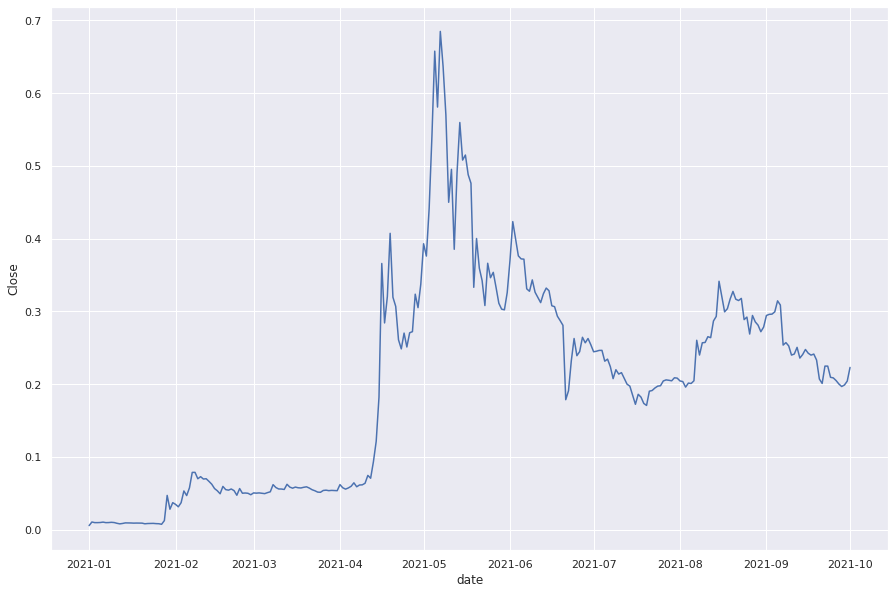

In [ ]:
fig, ax1 = plt.subplots(figsize=(15,10))
sns.lineplot(data= dfResumido , x="date", y="Close",ax=ax1)
plt.show()

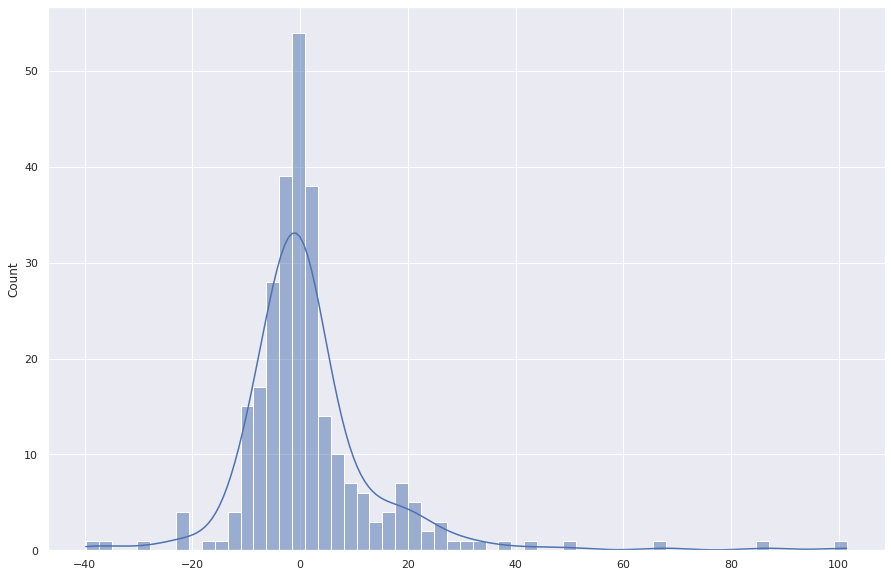

In [ ]:
#variação percentual 
sns.histplot( x = ((dfResumido['Close'] - dfResumido['Open'])/ dfResumido['Open'])*100, kde=True);

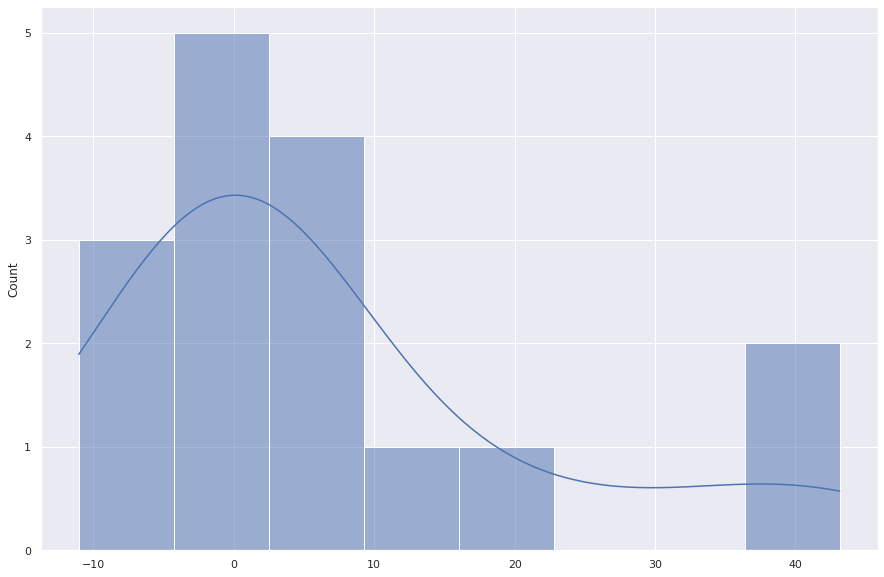

In [ ]:
#histograma da variação percectual no dias do tweet do elon musk
sns.histplot( x = ((dfInter['Close'] - dfInter['Open'])/ dfInter['Open'])*100,  kde=True);

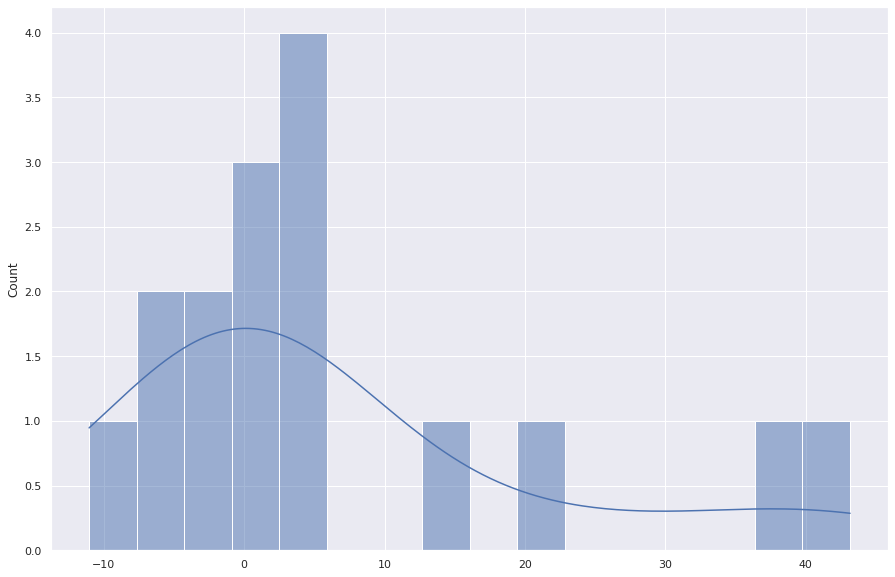

In [ ]:
#olhando todos os ponto separadamente
sns.histplot( x = ((dfInter['Close'] - dfInter['Open'])/ dfInter['Open'])*100,  kde=True, bins=dfInter.shape[0] );

In [ ]:
crypots = ((dfInter['Close'] - dfInter['Open'])/ dfInter['Open'])*100

mediaAmostragem = sum(crypots.values)/len(crypots.values)
#Teste t 

#H0
#: a média da amostra é igual à média da referência (ou população).
#H1
#: a média da amostra é diferente à média da referência (ou população).

#https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.ttest_1samp.html#scipy.stats.ttest_1samp
#http://www.cpaqv.org/estatistica/tabelas_cpaqv.pdf

#grau de Liberdade
result = stats.ttest_1samp(crypots.values,mediaPop)
result.pvalue < 0.05




False

### Análise dos tweets usando análise de sentimento VADER

In [ ]:
sentimental = [sentiment_scores(i) for i in dogeDf['tweet']]
dfSentimento = dogeDf.copy()
dfSentimento["Sentimento"] = sentimental
dfSentimento =dfSentimento.loc[(dfSentimento['date'] >=pd.to_datetime(dataIni))& (dfSentimento['date'] <=pd.to_datetime(dataFim)) ] 
dfSentimento['date']  = pd.to_datetime( dfSentimento['date'])
dfInter["variacao"] = ((dfInter['Close'] - dfInter['Open'])*100/ dfInter['Open']).values
dfSentimento["variacao"] = [dfInter.loc[dfInter["date"]==i,"variacao"].values[0] for i in dfSentimento['date']]
dfSentimento

In [ ]:
sns.histplot( x =dfSentimento["Sentimento"]);

In [ ]:
#Media das variações para tipo de sentimento
{"Media "+i:dfSentimento.loc[dfSentimento['Sentimento']==i,"variacao"].mean() for i in dfSentimento['Sentimento'].unique()}


# Base Bitcoins Geral 2016-2019

In [ ]:
#https://towardsdatascience.com/downloading-datasets-into-google-drive-via-google-colab-bcb1b30b0166

## Pre-Processamento

In [4]:
import random

p = 0.01

In [18]:
df_bitcoinGeral = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Dataset/tweets.csv", skiprows=lambda i: i>0 and random.random() > p, error_bad_lines=False, nrows=250000, sep=';')


In [19]:
df_bitcoinGeral.dtypes # precisamos converter as columnas numéricas para numeros depois

id            object
user          object
fullname      object
url           object
timestamp     object
replies      float64
likes        float64
retweets     float64
text          object
dtype: object

In [20]:
df_bitcoinGeral

,id,user,fullname,url,timestamp,replies,likes,retweets,text
0,1132975119176015873,mariita52steem,mariita52,NaN,2019-05-27 11:41:32+00,0.0,1.0,1.0,Day # 2 Making noise on twitter.\n### Sharing ...
1,1132977473052913665,WhatsappEmoji,whatshappening,NaN,2019-05-27 11:50:53+00,0.0,0.0,0.0,1. #BTC: $8704.59 (9.36%)\n2. #ETH: $266.60 (7...
2,1132977526211469314,imogenstephani1,らき☆すた高良みゆき,NaN,2019-05-27 11:51:06+00,0.0,0.0,0.0,BTC\n\n週足のチャネルライン下端まで価格が落ち込みました。\n\n日足の形を見ても売り...
3,1132978424673390594,blogotey,Бизнес-Журнал,NaN,2019-05-27 11:54:40+00,0.0,0.0,0.0,Рейтинг Bitcoin вырос. Китай опубликовал новый...
4,1132913613344190465,sabotagebeats,Dogeoshi Nakadoggo©,NaN,2019-05-27 05:37:08+00,0.0,0.0,0.0,Unpopular opinion: Bitcoin Maximalists hate al...
...,...,...,...,...,...,...,...,...,...
169493,1198265623786217472,Andy84268340,Andy,NaN,2019-11-23 15:42:42+00,0.0,0.0,0.0,@CNBC Setup your FREE account Now : https://t....
169494,1198265671332827137,BitcoinNewsCom,BitcoinNews.com,NaN,2019-11-23 15:42:53+00,0.0,0.0,0.0,Daily Trending Bitcoin News and Market Sentime...
169495,1198265726437482496,selim11000,さゆ★マネー,NaN,2019-11-23 15:43:06+00,0.0,0.0,0.0,2019年7月\nブルガリアでビットコイン保有量が金の保有量を上回る\n#仮想通貨 $BTC...
169496,1198266365938790400,emergeen,Emergeen DN,NaN,2019-11-23 15:45:39+00,0.0,0.0,0.0,#bitcoin #wallet #BitcoinCash #BitcoinGiveAway...


In [21]:
colunas_relevantes = ["timestamp", "replies", "likes", "retweets", "text"]

In [22]:
df_bitcoinGeral = df_bitcoinGeral[colunas_relevantes]
df_bitcoinGeral = df_bitcoinGeral.sort_values(by="timestamp")

In [23]:
df_bitcoinGeral['timestamp'].count() # há algumas entradas com NaT (entra nula de data, como iremos transformar a data para o index, tiramos essas linhas)

169493

In [24]:
df_bitcoinGeral['timestamp'] = pd.to_datetime(df_bitcoinGeral['timestamp'], errors = "coerce")

In [25]:
df_bitcoinGeral = df_bitcoinGeral.dropna(axis = 0, how = "any", subset = ["timestamp"])

In [27]:
df_bitcoinGeral = df_bitcoinGeral.rename(columns={"timestamp": "Date"})

In [28]:
df_bitcoinGeral = df_bitcoinGeral.set_index("Date")

In [ ]:
# talvez parse json str -> python list

In [29]:
numerical_columns = ["replies", "likes", "retweets"]

In [30]:
def custom_to_int(x):
    return pd.to_numeric(x, downcast="integer", errors="coerce")

In [31]:
df_bitcoinGeral[numerical_columns] = df_bitcoinGeral[numerical_columns].apply(custom_to_int)

In [32]:
df_bitcoinGeral

,replies,likes,retweets,text
Date,,,,
2010-07-21 21:46:59+00:00,1,3,1,Been playing around with the Bitcoin P2P curre...
2011-06-29 14:05:45+00:00,1,1,1,"OK, I'll admit it. I'm surprised Bitcoin's val..."
2012-01-01 23:03:43+00:00,0,0,0,Mon Jan 2 00:02:09 2012 - Traded 38.9460974 B...
2012-01-01 23:06:17+00:00,0,0,0,Mon Jan 2 00:03:52 2012 - Traded 0.18431518 B...
2012-01-01 23:07:37+00:00,0,0,0,Mon Jan 2 00:06:22 2012 - Traded 0.88 BTC at ...
...,...,...,...,...
2019-11-23 15:42:42+00:00,0,0,0,@CNBC Setup your FREE account Now : https://t....
2019-11-23 15:42:53+00:00,0,0,0,Daily Trending Bitcoin News and Market Sentime...
2019-11-23 15:43:06+00:00,0,0,0,2019年7月\nブルガリアでビットコイン保有量が金の保有量を上回る\n#仮想通貨 $BTC...


In [33]:
df_bitcoinGeral.dtypes # agora os tipos estão conforme o esperado

replies      int16
likes        int16
retweets     int16
text        object
dtype: object

Fazendo uma limpeza agressiva (dropar todas as linhas que tenham uma valor qualquer nulo), a única coluna que tem valores nulos é a de "hashtag" o que tudo bem

In [34]:
df_bitcoinGeral.dropna()
# o tamanho não se modifica (se tirarmos o subset e a conversão das hashtags acima sim, porque há tweets sem hashtags)
# cerca de 1% dos tweets não usa hashtag, isso talvez sugira que a base foi coletada com alguma heurística de hashtags

,replies,likes,retweets,text
Date,,,,
2010-07-21 21:46:59+00:00,1,3,1,Been playing around with the Bitcoin P2P curre...
2011-06-29 14:05:45+00:00,1,1,1,"OK, I'll admit it. I'm surprised Bitcoin's val..."
2012-01-01 23:03:43+00:00,0,0,0,Mon Jan 2 00:02:09 2012 - Traded 38.9460974 B...
2012-01-01 23:06:17+00:00,0,0,0,Mon Jan 2 00:03:52 2012 - Traded 0.18431518 B...
2012-01-01 23:07:37+00:00,0,0,0,Mon Jan 2 00:06:22 2012 - Traded 0.88 BTC at ...
...,...,...,...,...
2019-11-23 15:42:42+00:00,0,0,0,@CNBC Setup your FREE account Now : https://t....
2019-11-23 15:42:53+00:00,0,0,0,Daily Trending Bitcoin News and Market Sentime...
2019-11-23 15:43:06+00:00,0,0,0,2019年7月\nブルガリアでビットコイン保有量が金の保有量を上回る\n#仮想通貨 $BTC...


In [35]:
df_bitcoinGeral = df_bitcoinGeral.set_index(pd.to_datetime(df_bitcoinGeral.index.date))

In [36]:
df_bitcoinGeral.index.name = 'Date'

In [37]:
valid_days = set(df_bitcoinGeral.index)

In [38]:
len(valid_days)

2584

In [43]:
pd.to_datetime("2016-02-05") in valid_days

True

In [44]:
pd.to_datetime("2019-02-11") in valid_days # há dias sem tweet?

True

In [41]:
df_bitcoinGeral.index

DatetimeIndex(['2010-07-21', '2011-06-29', '2012-01-01', '2012-01-01',
               '2012-01-01', '2012-01-02', '2012-01-02', '2012-01-03',
               '2012-01-03', '2012-01-03',
               ...
               '2019-11-23', '2019-11-23', '2019-11-23', '2019-11-23',
               '2019-11-23', '2019-11-23', '2019-11-23', '2019-11-23',
               '2019-11-23', '2019-11-23'],
              dtype='datetime64[ns]', name='Date', length=169493, freq=None)

## Analise Sentimento VADER

In [48]:
%%time
sentimental_geral = [sentiment_scores(str(i)) for i in df_bitcoinGeral['text']]

CPU times: user 33min 43s, sys: 1min 11s, total: 34min 54s
Wall time: 35min


In [49]:
df_bitcoinGeral["sentimento"] = sentimental_geral

In [50]:
df_bitcoinGeral

,replies,likes,retweets,text,sentimento
Date,,,,,
2010-07-21,1,3,1,Been playing around with the Bitcoin P2P curre...,Positive
2011-06-29,1,1,1,"OK, I'll admit it. I'm surprised Bitcoin's val...",Positive
2012-01-01,0,0,0,Mon Jan 2 00:02:09 2012 - Traded 38.9460974 B...,Neutral
2012-01-01,0,0,0,Mon Jan 2 00:03:52 2012 - Traded 0.18431518 B...,Neutral
2012-01-01,0,0,0,Mon Jan 2 00:06:22 2012 - Traded 0.88 BTC at ...,Neutral
...,...,...,...,...,...
2019-11-23,0,0,0,@CNBC Setup your FREE account Now : https://t....,Positive
2019-11-23,0,0,0,Daily Trending Bitcoin News and Market Sentime...,Positive
2019-11-23,0,0,0,2019年7月\nブルガリアでビットコイン保有量が金の保有量を上回る\n#仮想通貨 $BTC...,Neutral


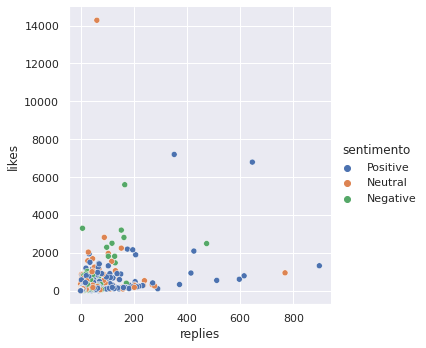

In [51]:
sns.relplot(x="replies", y="likes", data=df_bitcoinGeral, hue = "sentimento")

CPU times: user 3.52 s, sys: 267 ms, total: 3.79 s
Wall time: 3.59 s


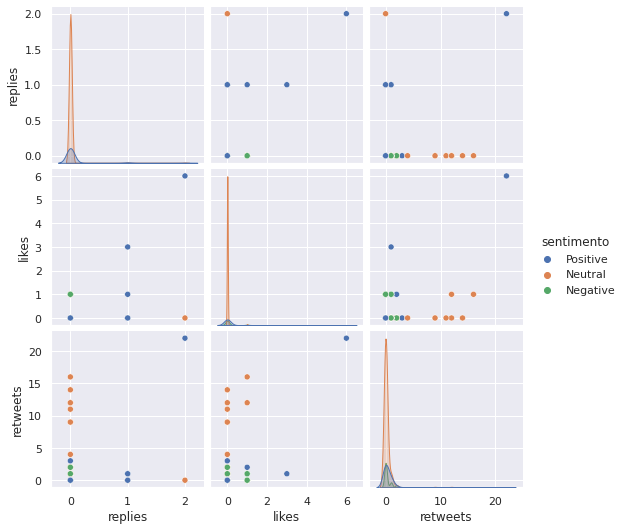

In [52]:
%%time
sns.pairplot(df_bitcoinGeral[["replies",	"likes",	"retweets"	, "sentimento"]].reset_index().iloc[0:1000], hue = "sentimento")

CPU times: user 12.7 s, sys: 472 ms, total: 13.2 s
Wall time: 13 s


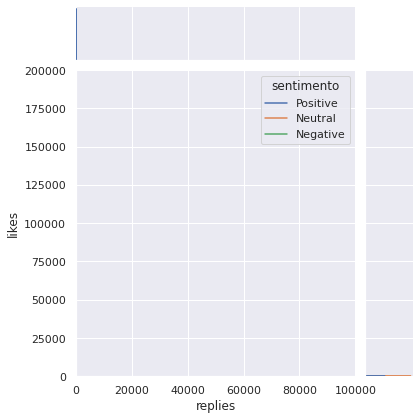

In [53]:
%%time
sns.jointplot(data=df_bitcoinGeral[["replies",	"likes",	"retweets", "sentimento"]].reset_index().iloc[0:10000],
              x="replies", y="likes", hue="sentimento", kind="kde", xlim=[0, 100000], ylim=[0, 0.2e6])

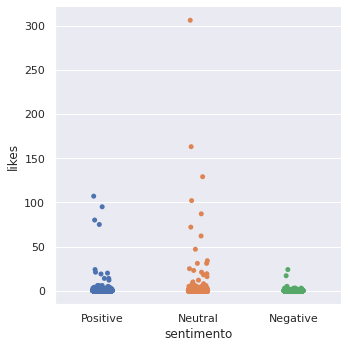

In [54]:
sns.catplot(x="sentimento", y="likes", data=df_bitcoinGeral[["replies",	"likes",	"retweets", "sentimento"]].reset_index().iloc[0:10000])

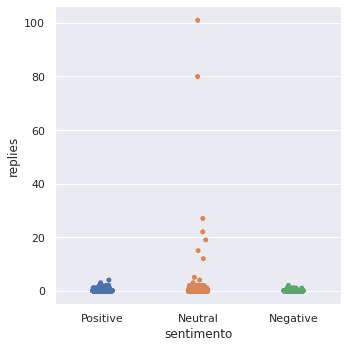

In [55]:
sns.catplot(x="sentimento", y="replies", data=df_bitcoinGeral[["replies",	"likes",	"retweets", "sentimento"]].reset_index().iloc[0:10000])

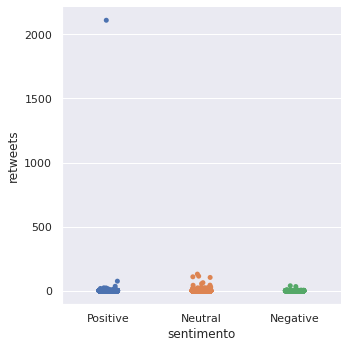

In [56]:
sns.catplot(x="sentimento", y="retweets", data=df_bitcoinGeral[["replies",	"likes",	"retweets", "sentimento"]].reset_index().iloc[0:10000])

In [80]:
df_bitcoinGeral["isPositive"] = df_bitcoinGeral["sentimento"] == "Positive"
df_bitcoinGeral["isNeutral"] = df_bitcoinGeral["sentimento"] == "Neutral"
df_bitcoinGeral["isNegative"] = df_bitcoinGeral["sentimento"] == "Negative"

In [81]:
df_bitcoinSentimentos = df_bitcoinGeral.groupby("Date").sum()[["isPositive", "isNeutral", "isNegative"]]

In [82]:
df_bitcoinSentimentos

,isPositive,isNeutral,isNegative
Date,,,
2010-07-21,1,0,0
2011-06-29,1,0,0
2012-01-01,0,3,0
2012-01-02,0,2,0
2012-01-03,0,4,0
...,...,...,...
2019-11-19,226,330,95
2019-11-20,266,288,75
2019-11-21,248,346,121


In [83]:
dfMaxMin_perDay["isPositive"] = df_bitcoinSentimentos["isPositive"]
dfMaxMin_perDay["isNeutral"] = df_bitcoinSentimentos["isNeutral"]
dfMaxMin_perDay["isNegative"] = df_bitcoinSentimentos["isNegative"]

In [84]:
df_bitcoinSentimentos = df_bitcoinSentimentos.set_index(df_bitcoinSentimentos.index.astype(str))

In [85]:
set(df_bitcoinSentimentos.index).intersection(set(dfMaxMin_perDay.index))

set()

# Import Dataset from Kaggle

In [2]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"rickysilva","key":"05365a7f12b6a7cb22ede67a70fa18f3"}'}

In [3]:
!pip install -q kaggle
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!ls ~/.kaggle
!chmod 600 /root/.kaggle/kaggle.json  # set permission

kaggle.json


In [8]:
!kaggle datasets download -d alaix14/bitcoin-tweets-20160101-to-20190329 -p "/content/drive/MyDrive/Colab Notebooks/Dataset"

100% 1.58G/1.58G [00:26<00:00, 39.8MB/s]
100% 1.58G/1.58G [00:27<00:00, 62.0MB/s]


In [10]:
import os
os.chdir("/content/drive/MyDrive/Colab Notebooks/Dataset")
!mkdir test
!unzip -q bitcoin-tweets-20160101-to-20190329.zip -d test